In [1]:
import pandas as pd

In [2]:
from psaw import PushshiftAPI    #library Pushshift
import datetime as dt            #library for date management
#import p                         #library for data manipulation
import matplotlib.pyplot as plt  #library for plotting

In [3]:
api = PushshiftAPI()              #Object of the API

In [4]:
"""FOR POSTS"""
def data_prep_posts(subreddit, start_time, end_time, filters, limit):
    if(len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'domain', 'url',
                   'title', 'num_comments']                 
                   #We set by default some useful columns

    posts = list(api.search_submissions(
        subreddit=subreddit,   #Subreddit we want to audit
        after=start_time,      #Start date
        before=end_time,       #End date
        filter=filters,        #Column names we want to retrieve
        limit=limit))          ##Max number of posts

    return pd.DataFrame(posts) #Return dataframe for analysis

In [5]:
"""FOR COMMENTS"""
def data_prep_comments(sub, start_time, end_time, filters, limit):
    if (len(filters) == 0):
        filters = ['id', 'author', 'created_utc', 'score', 'is_submitter', 'comment_type',
                   'body', 'permalink', 'subreddit', 'no_follow']
                   #We set by default some usefull columns 

    comments = list(api.search_comments(
        subreddit=sub,                 #Subreddit we want to audit
        after=start_time,       #Start date
        before=end_time,        #End date
        filter=filters,         #Column names we want to retrieve
        limit=limit))           #Max number of comments
    return pd.DataFrame(comments) #Return dataframe for analysis

In [88]:
def count_posts_per_date(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.date]).count().plot(y='id', rot=45, kind='bar', label='Posts', legend=True, figsize=(8,13))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
def count_posts_per_month(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.month]).count().plot(y='id', rot=45, kind='bar', label='Posts', legend=True, figsize=(8,8))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
def count_posts_per_year(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.year]).count().plot(y='id', rot=45, kind='bar', label='Posts', legend=True, figsize=(8,8))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [91]:
def mean_comments_per_date(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.date]).mean().plot(y='num_comments', rot=45, kind='line', label='Comments', legend=True, figsize=(8,13))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
def mean_comments_per_month(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.month]).mean().plot(y='num_comments', rot=45, kind='line', label='Comments', legend=True, figsize=(8,8))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
def mean_comments_per_year(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.year]).mean().plot(y='num_comments', rot=45, kind='line', label='Comments', legend=True, figsize=(8,8))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [94]:
def most_active_author(df_p, title, xlabel, ylabel, limit):
    df_p.groupby([df_p.author]).count()['id'].nlargest(limit).sort_values(ascending=True).plot(y='id', rot=45, kind='barh', label='Users', legend=True, figsize=(8,13))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [95]:
def get_posts_orign(df_p, title, xlabel, ylabel, limit, subreddit):
    domains = df_p[(df_p.domain != 'reddit.com') & (df_p.domain != f'self.{subreddit}') & (df_p.domain != 'i.redd.it')]
    domains.groupby(by='domain').count()['id'].nlargest(limit).sort_values(ascending=True).plot(kind='barh', rot=45, x='domain', label='# of posts', legend=True, figsize=(8,13))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [96]:
def get_subreddits(df_p, title, xlabel, ylabel, limit):
    df_p.groupby(by='subreddit').count()['id'].nlargest(limit).sort_values(ascending=True).plot(kind='barh', x='subreddit', label='Subreddit', legend=True, figsize=(8,13))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [58]:
def get_subreddit_data_and_save_to_csv(subreddit, day_start, month_start, year_start, day_end, month_end, year_end, file_name):
    #subreddit = "TodayIAte"                           #Name of the subreddit we are auditing
    start_time = int(dt.datetime(year_start, month_start, day_start).timestamp())  #We define the starting date for our search
    end_time = int(dt.datetime(year_end, month_end, day_end).timestamp())   #We define the ending date for our search
    filters = []                                           #We don´t want specific filters
    limit = None   #Number of elelemts we want to recieve

    """Here we are going to get subreddits for a brief analysis"""
    df_p = data_prep_posts(subreddit,start_time,
                             end_time,filters,limit)           #Call function for dataframe creation of comments
    df_p['datetime'] = df_p['created_utc'].map(
            lambda t: dt.datetime.fromtimestamp(t))
    df_p = df_p.drop('created_utc', axis=1)                #Drop the column on timestamp format
    df_p = df_p.sort_values(by='datetime')                 #Sort the Row by datetime
    df_p["datetime"] = pd.to_datetime(df_p["datetime"])    #Convert timestamp format to datetime for data analysis


    df_p.to_csv(file_name, sep=',', # Save the dataset on a csv file for future analysis
                    header=True, index=False, columns=[
                'id', 'author', 'datetime', 'domain',
                'url', 'title', 'num_comments'
            ])

    print(subreddit + " number of posts: " + str(len(df_p)))


In [6]:
def get_subreddit_comments_and_save_to_csv(subreddit, day_start, month_start, year_start, day_end, month_end, year_end, file_name):
    
    start_time = int(dt.datetime(year_start, month_start, day_start).timestamp())  #We define the starting date for our search
    end_time = int(dt.datetime(year_end, month_end, day_end).timestamp())   #We define the ending date for our search
    filters = []                                           #We don´t want specific filters
    limit = None   #Number of elelemts we want to recieve

    """Here we are going to get subreddits for a brief analysis"""
    df_c = data_prep_comments(subreddit, start_time, end_time,filters,limit) 
    df_c['datetime'] = pd.to_datetime(df_c['created_utc'], errors='coerce')
    
    #df_c['datetime'] = df_c['created_utc'].map(lambda t: dt.datetime.fromtimestamp(t))
    
    df_c = df_c.drop('created_utc', axis=1)                #Drop the column on timestamp format
    df_c = df_c.sort_values(by='datetime')                 #Sort the Row by datetime
    df_c["datetime"] = pd.to_datetime(df_c["datetime"])    #Convert timestamp format to datetime for data analysis


    df_c.to_csv(file_name, sep=',', # Save the dataset on a csv file for future analysis
                    header=True, index=False, columns=[
                'id', 'author', 'datetime', 'score', 'is_submitter', 'comment_type',
                'body', 'permalink', 'subreddit', 'no_follow'
            ])

    print(subreddit + " number of posts: " + str(len(df_c)))

In [12]:
all_subreddit_names = [ 'Fitness', 'BBQ', 'xxfitness', 'weightroom', 'powerlifting', 'crossfit', 'orangetheory', 
                       'AdvancedRunning', 'BeachBodyWorkouts',
                       'bodyweightfitness', 'homegym', 'GYM','strength_training', 'fitness30plus', 'formcheck', 'running', 
                       'trailrunning', 'RunningWithDogs', 'homefitness', 'fitnessonline', 'homegym', 'loseit', 'progresspics', 
                       'workout', 'Athleanx', 'beginnerfitness', 'hiking', 'weightroom', 'StrongCurves', 'HealthyFood', 
                       'Stronglifts5x5', 'C25K', 'depression', 'mentalhealth', 'Meditation', 'yoga', 'pilates', 'Anxiety', 
                       'offmychest', 'mentalillness', 'Positivity', 'GetMotivated', 'happy','food', 'MealPrepSunday']

In [8]:
# Names of all subreddits we want to crawl:

# First create for covid years
for name in subreddits_for_analysis:
    get_subreddit_data_and_save_to_csv(name, 1, 1, 2015, 31, 12, 2021, f'dataset_{name}_posts_2015_2022.csv')
    
# Create files since 2015


NameError: name 'subreddits_for_analysis' is not defined

In [ ]:
# First create for covid years
for name in all_subreddit_names:
    get_subreddit_comments_and_save_to_csv(name, 1, 1, 2015, 31, 12, 2021, f'dataset_{name}_comments_2015_2022.csv')

ketorecipes number of posts: 524105
budgetfood number of posts: 104820
fromscratch number of posts: 4630


In [97]:
def perform_analysis(df_p, subreddit_name):
    count_posts_per_year(df_p, 'Post per year', 'Years', 'posts')
    count_posts_per_month(df_p, 'Post per month', 'Months', 'posts')
    count_posts_per_date(df_p, 'Post per date', 'Days', 'posts')
    
    mean_comments_per_year(df_p, 'Average comments per year', 'Years', 'comments')
    mean_comments_per_month(df_p, 'Average comments per month', 'Months', 'comments')
    mean_comments_per_date(df_p, 'Average comments per day', 'Days', 'comments')
    
    most_active_author(df_p, 'Most active users', 'Posts', 'Users', 30)
    
    get_posts_orign(df_p, 'Origin of crosspostings', 'Crossposts', 'Origins', 30, subreddit_name)
    

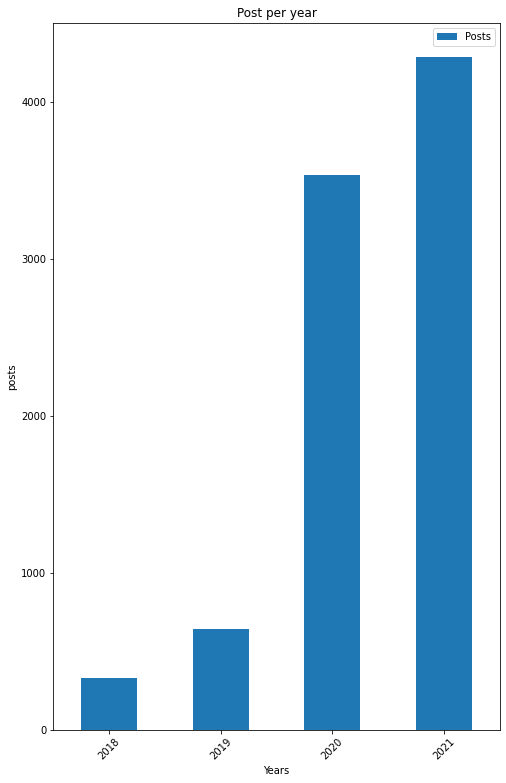

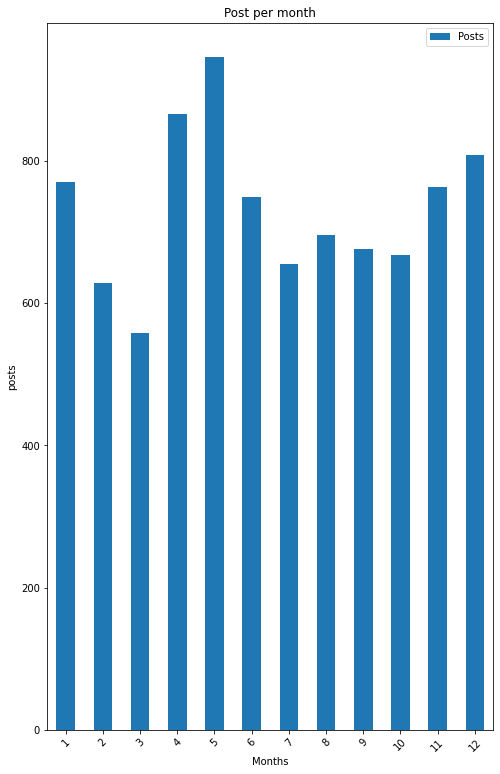

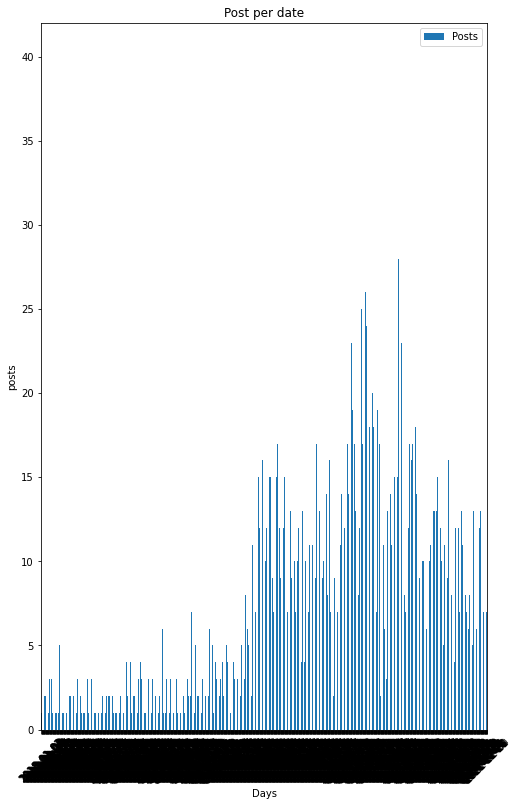

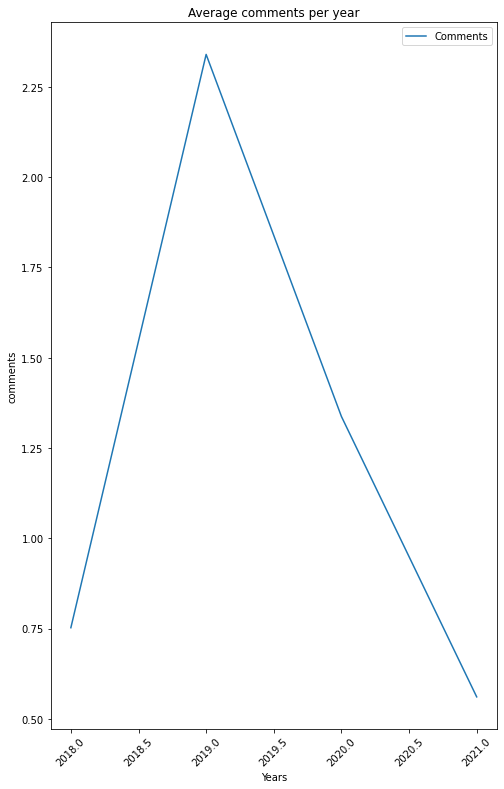

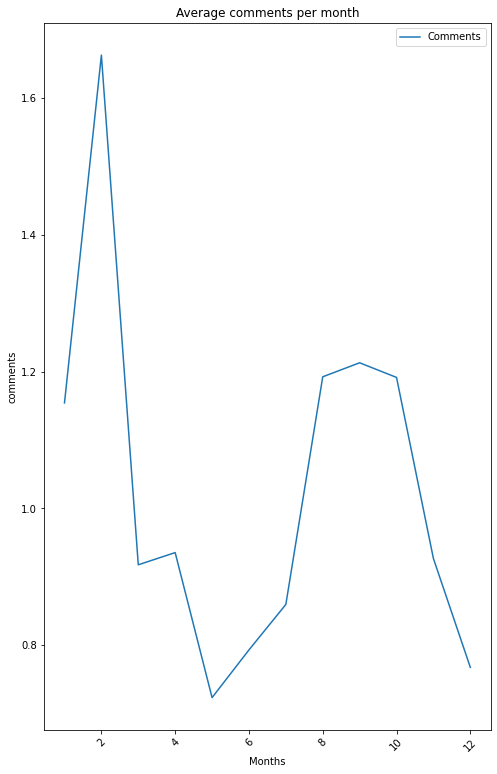

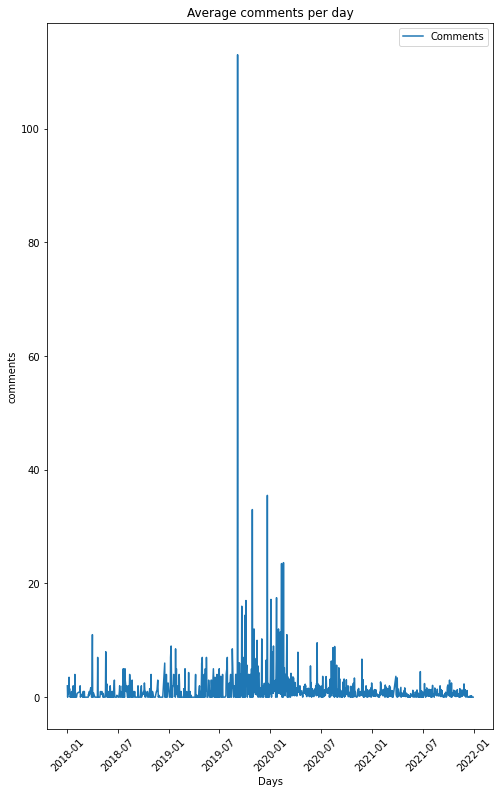

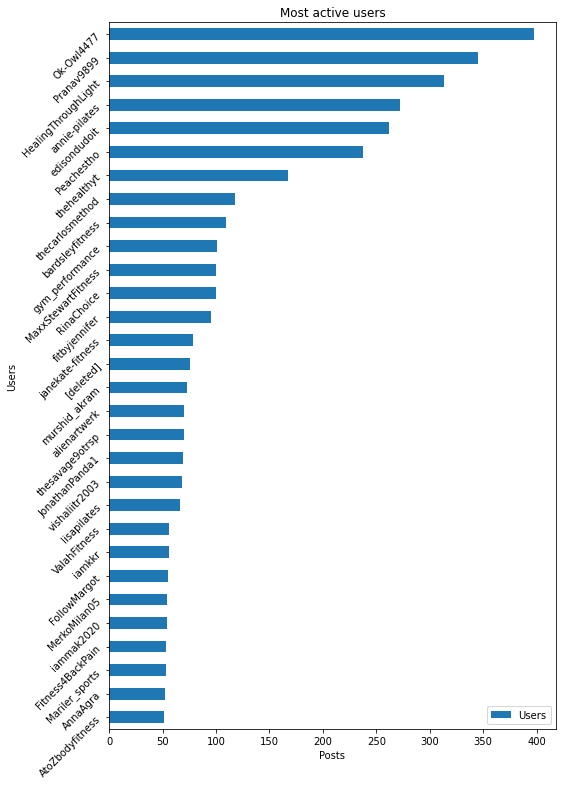

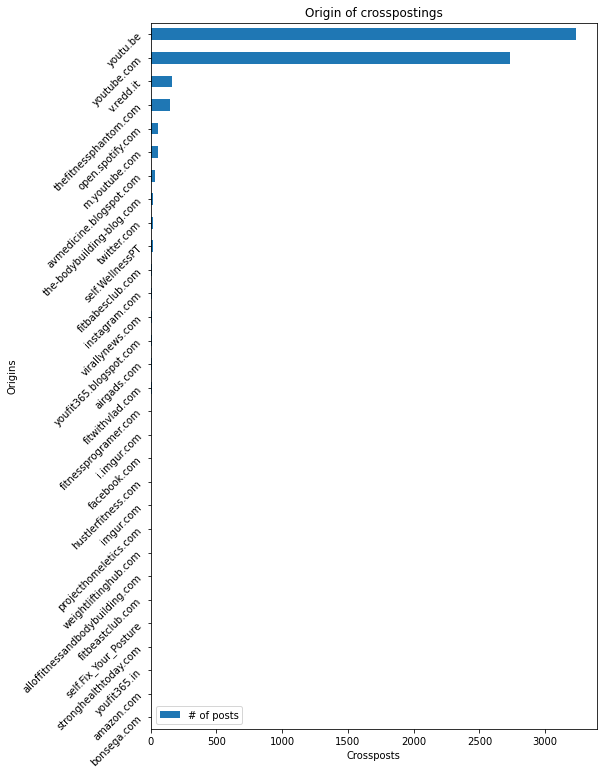

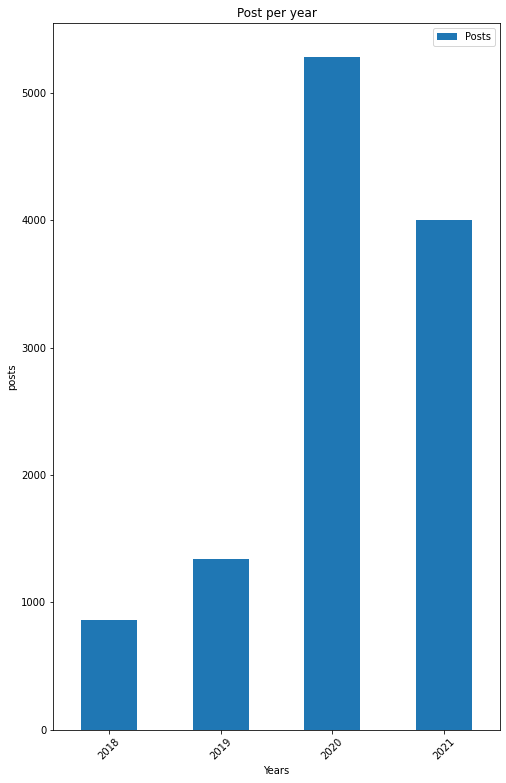

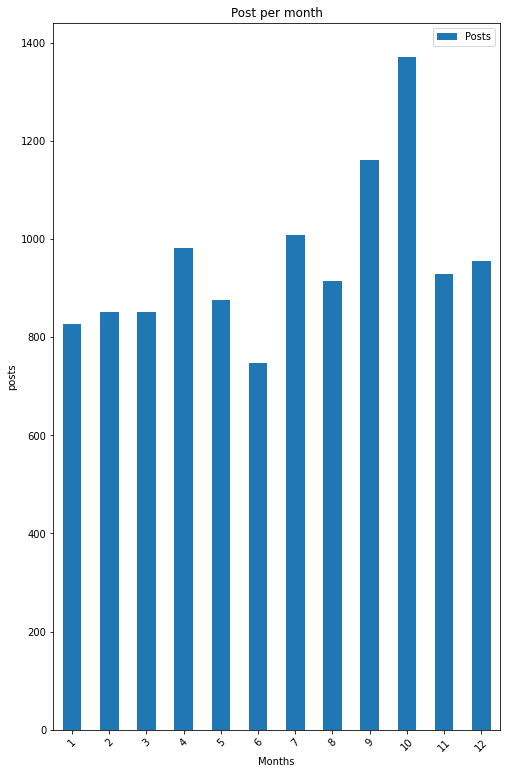

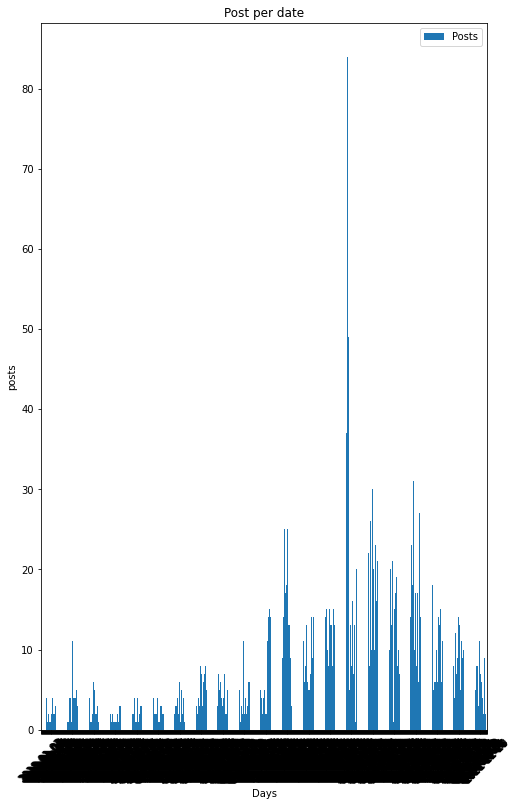

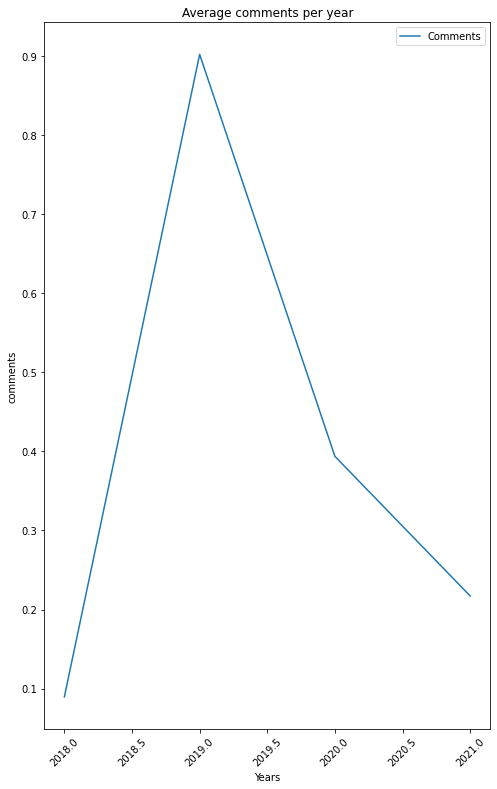

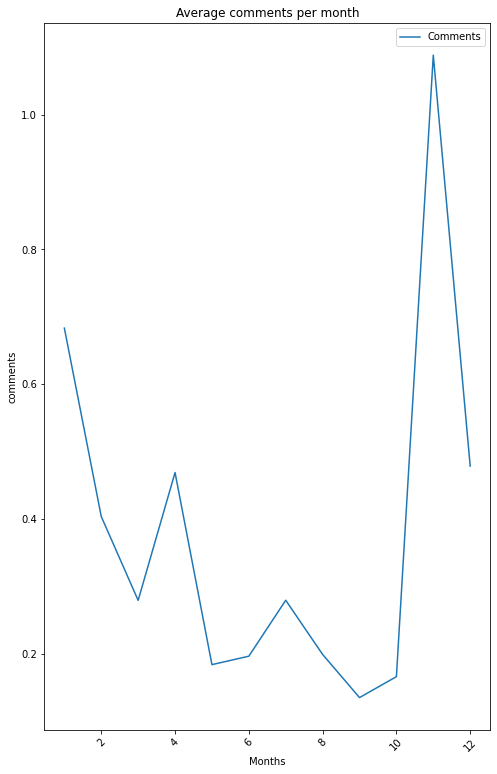

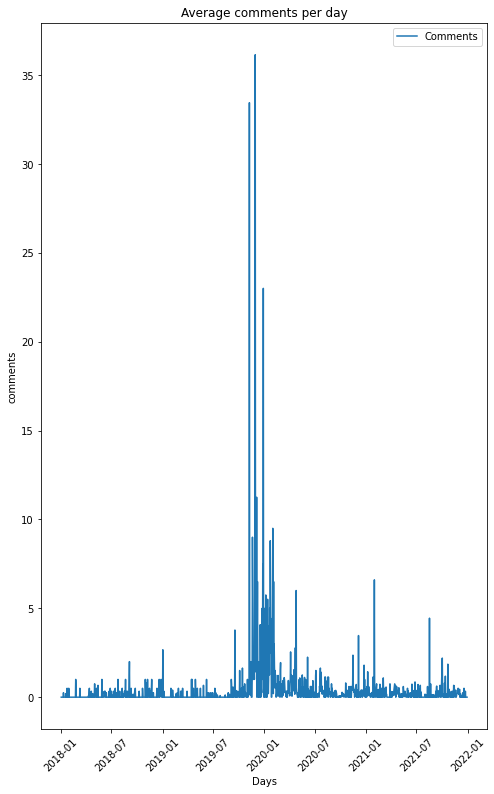

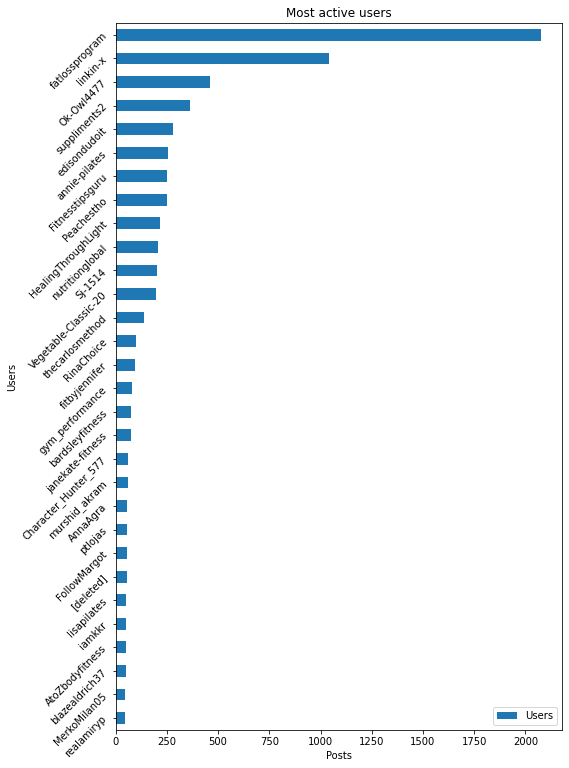

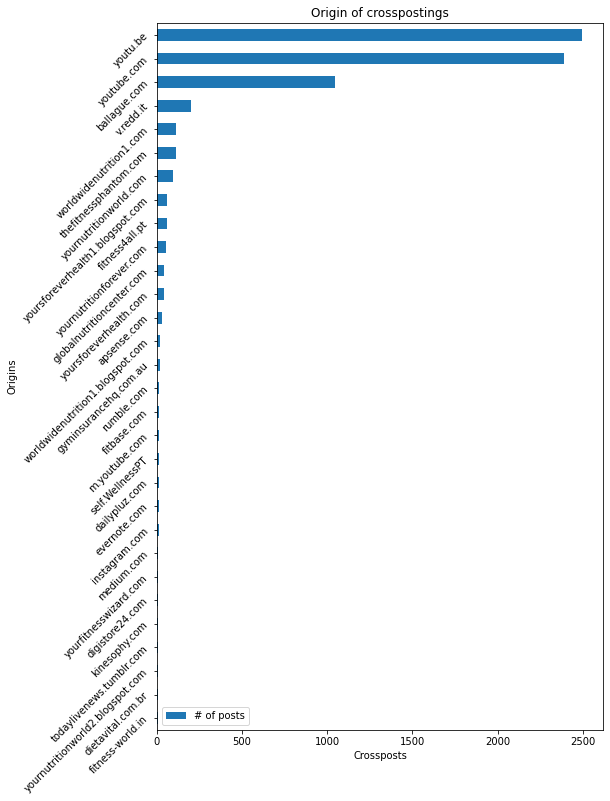

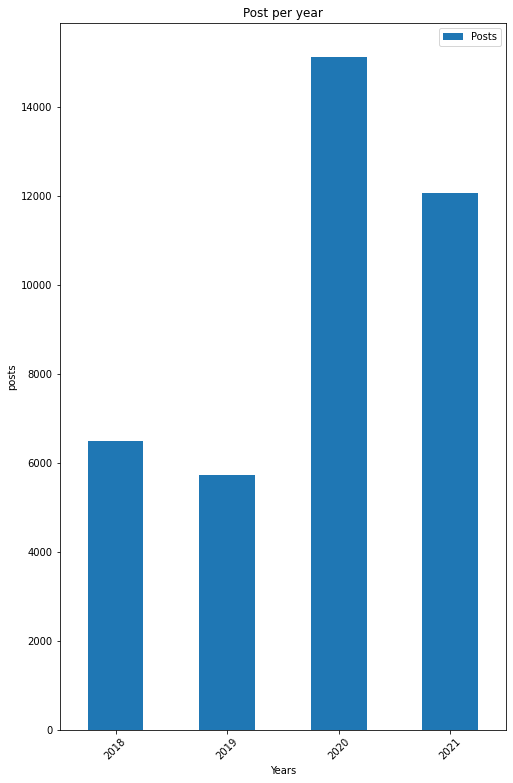

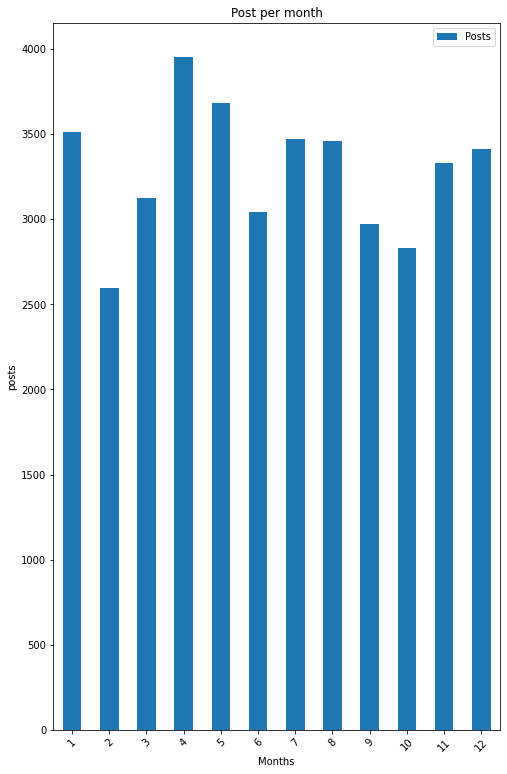

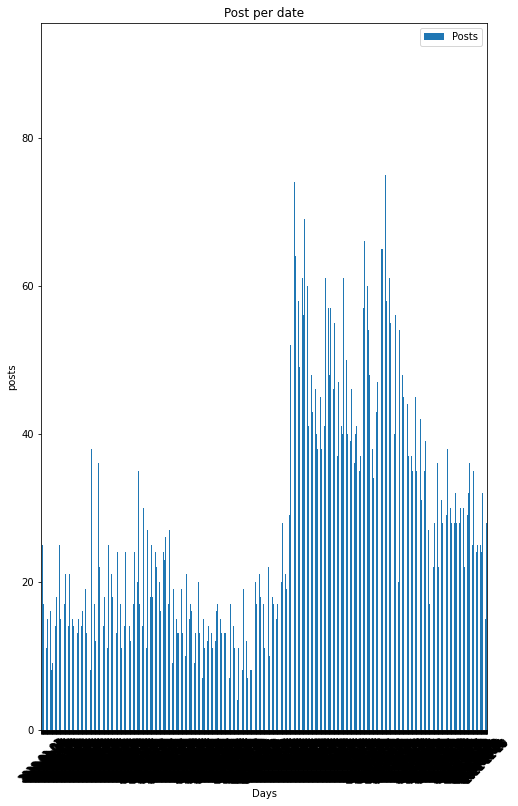

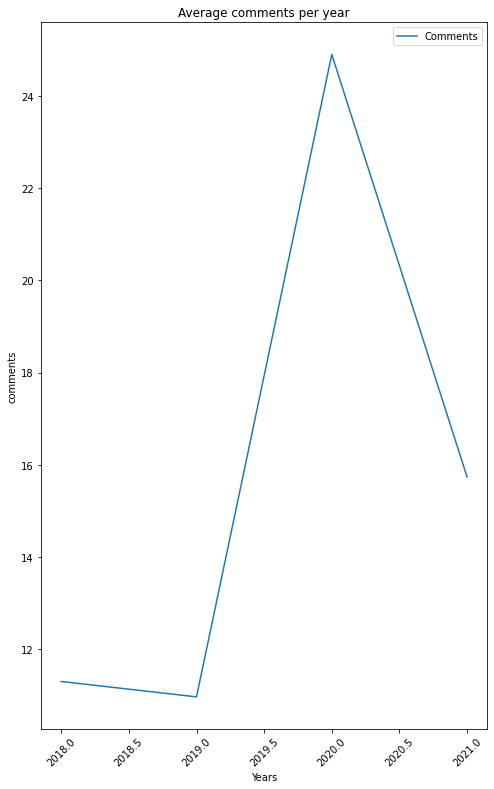

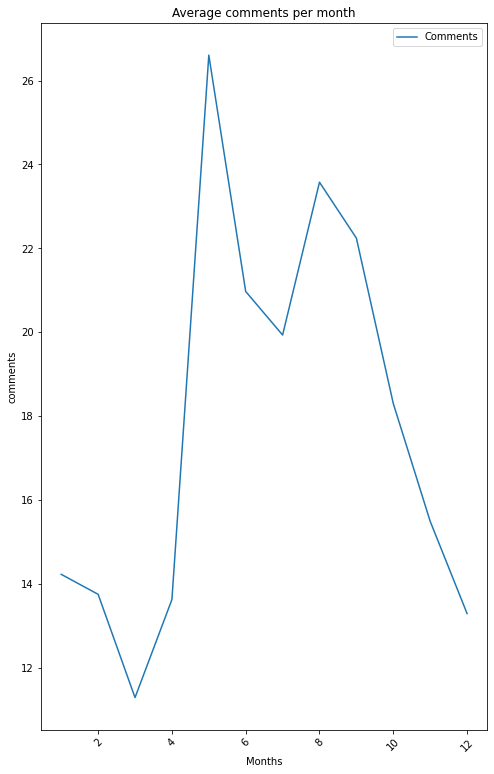

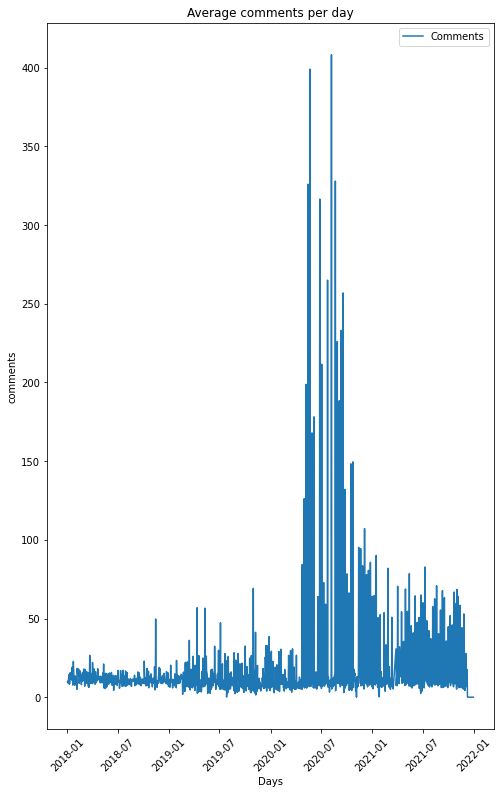

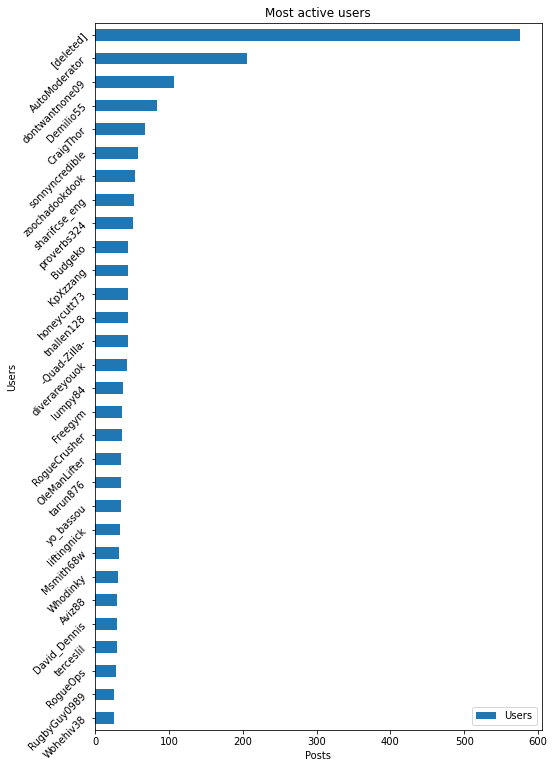

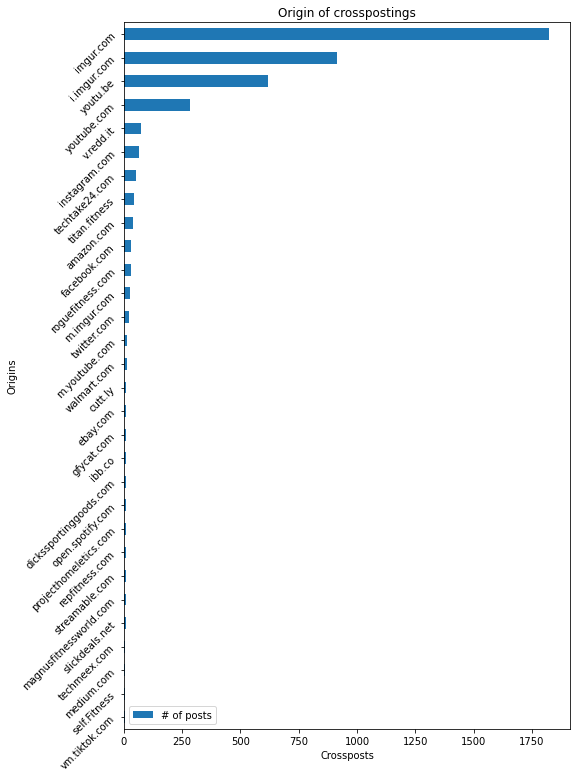

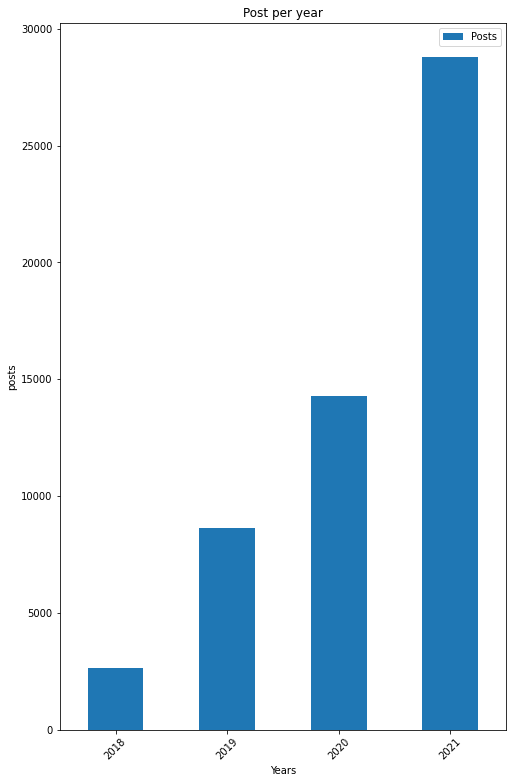

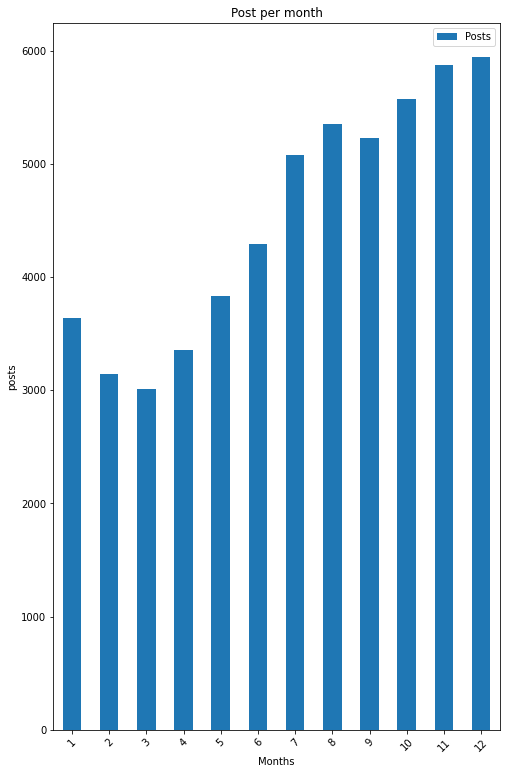

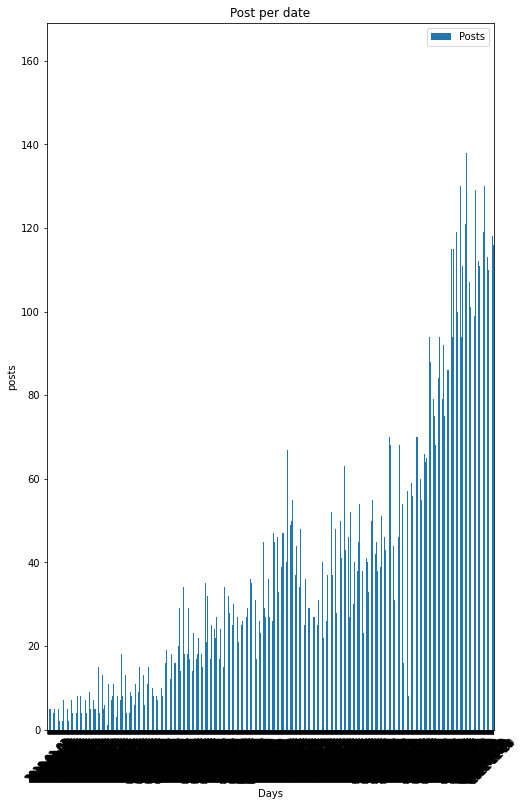

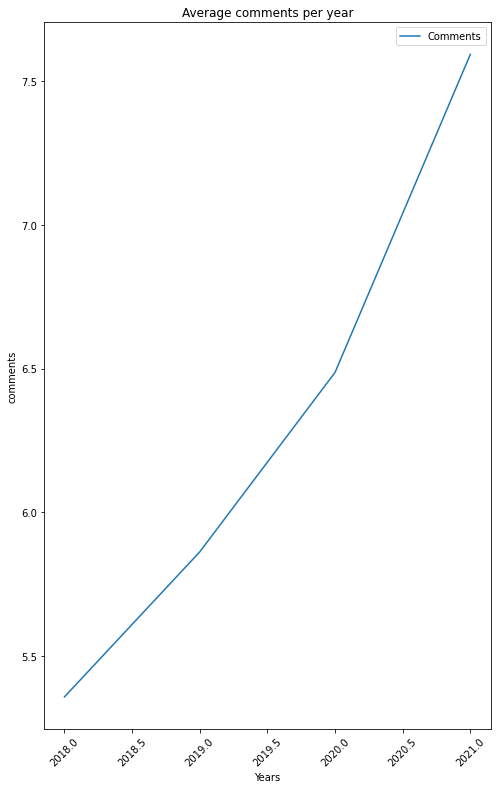

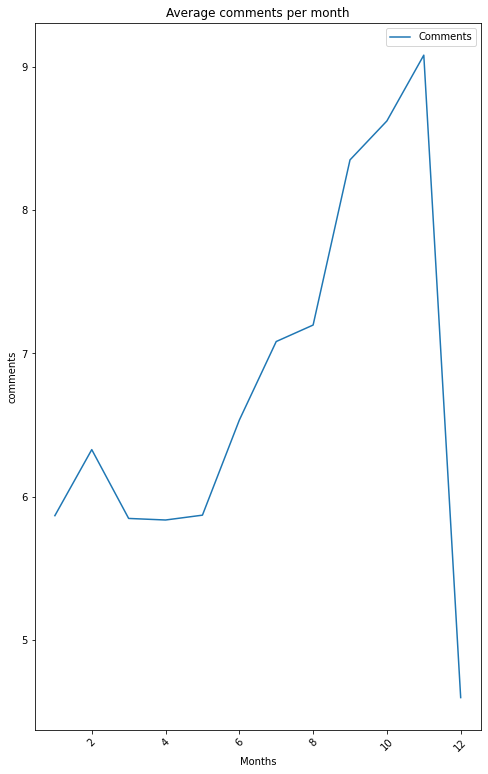

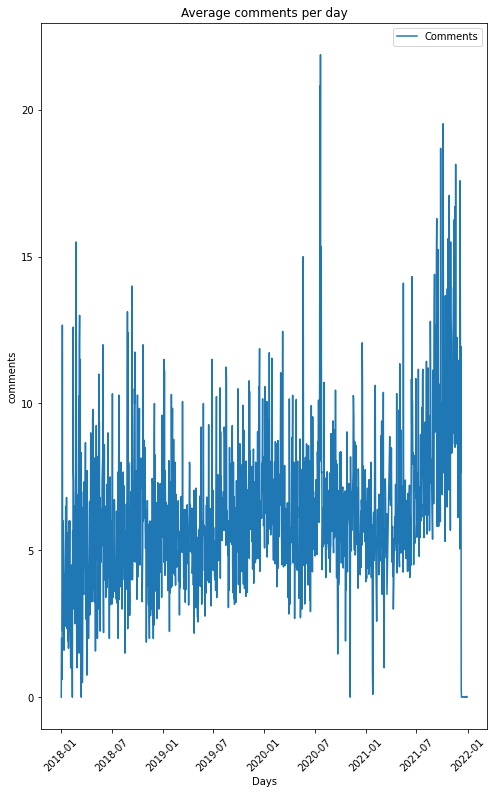

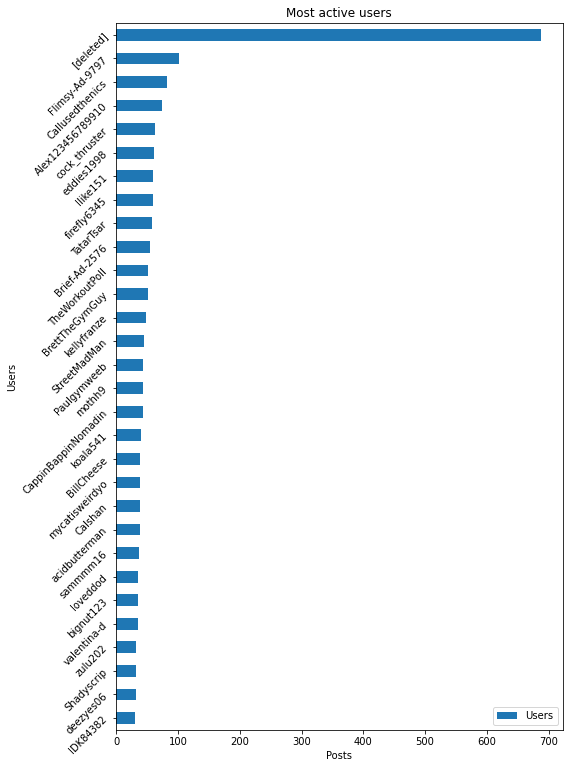

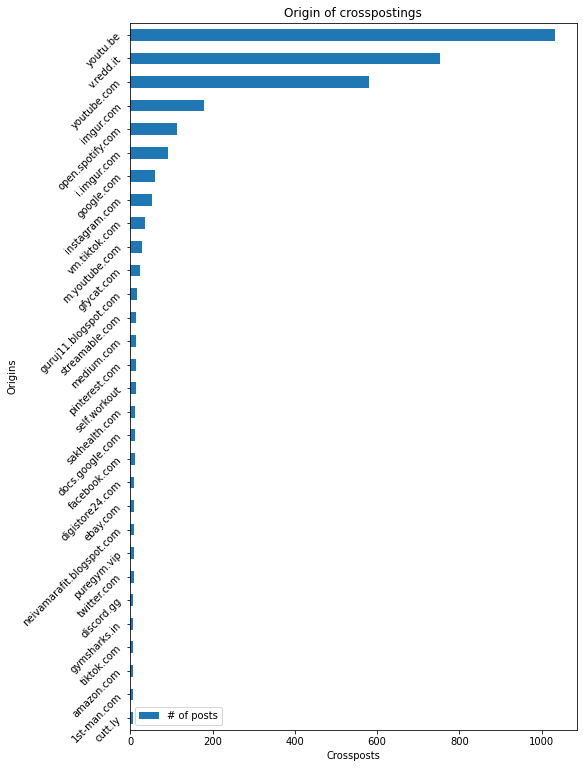

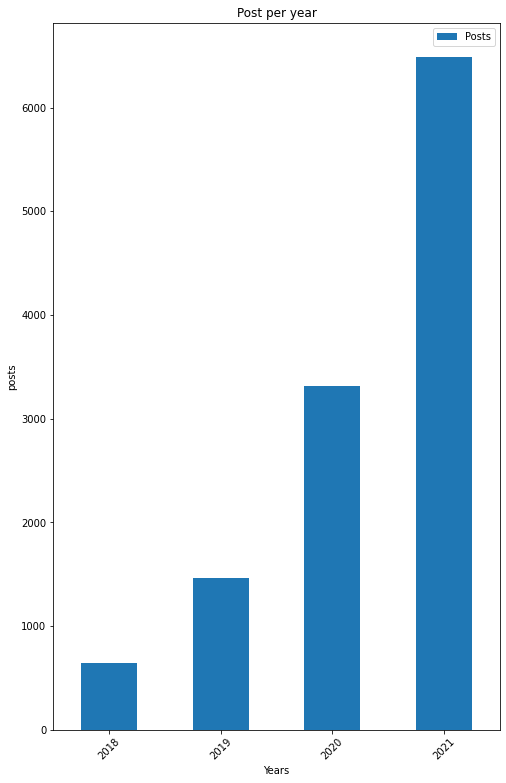

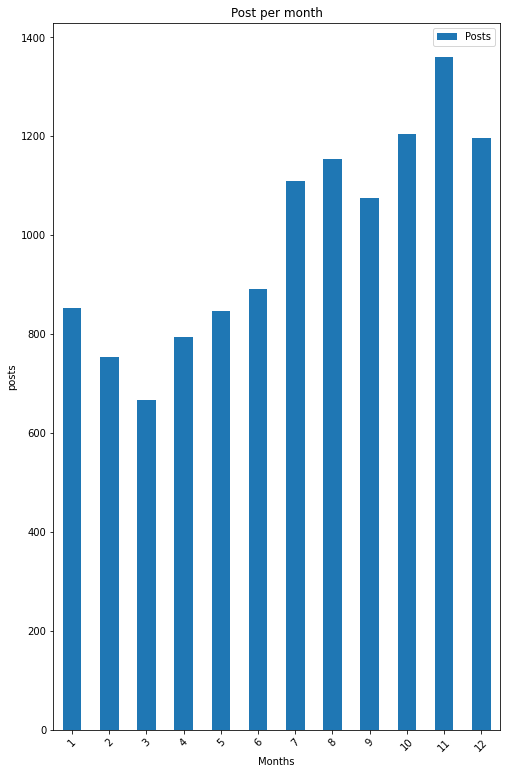

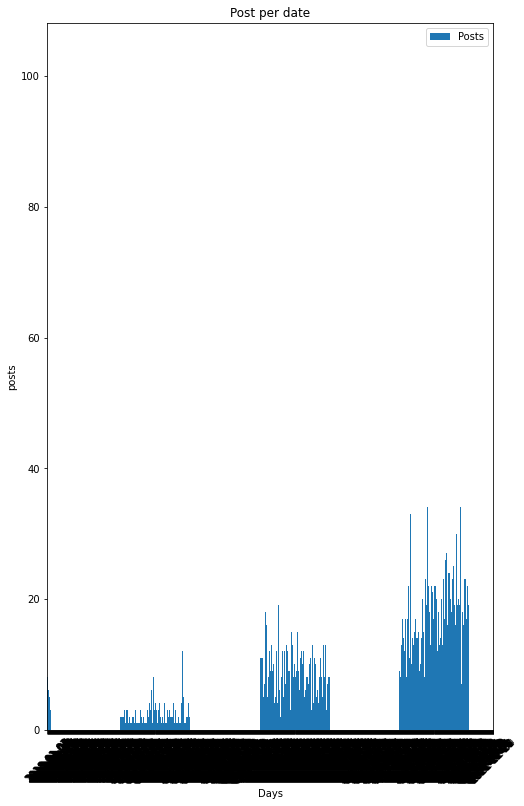

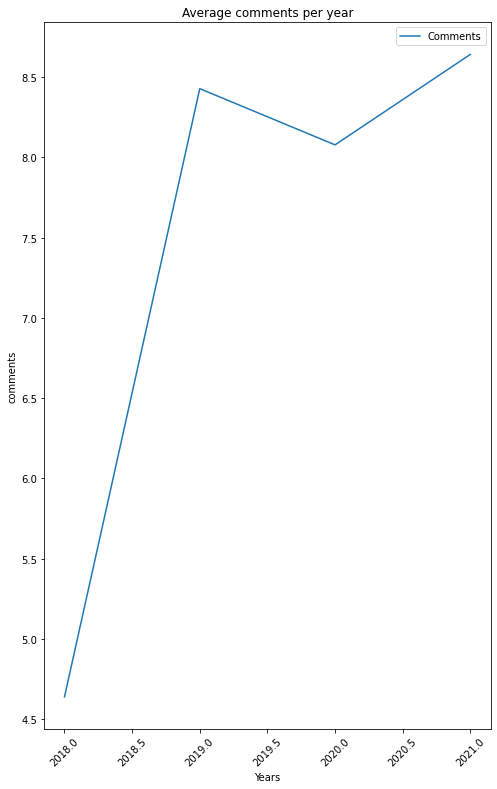

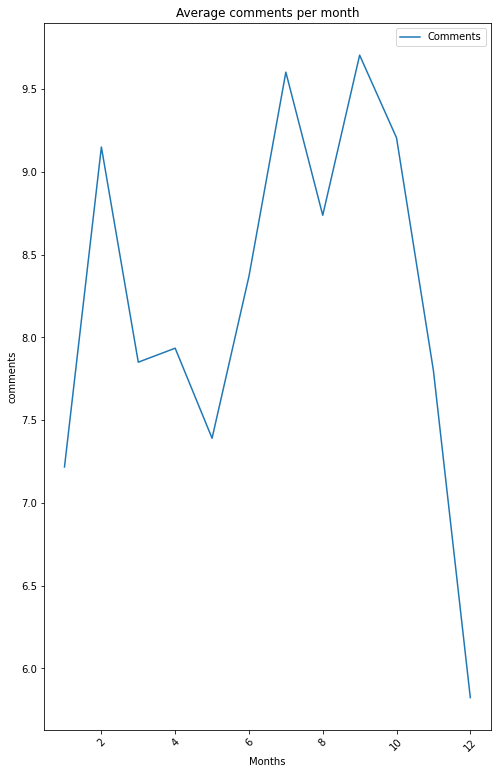

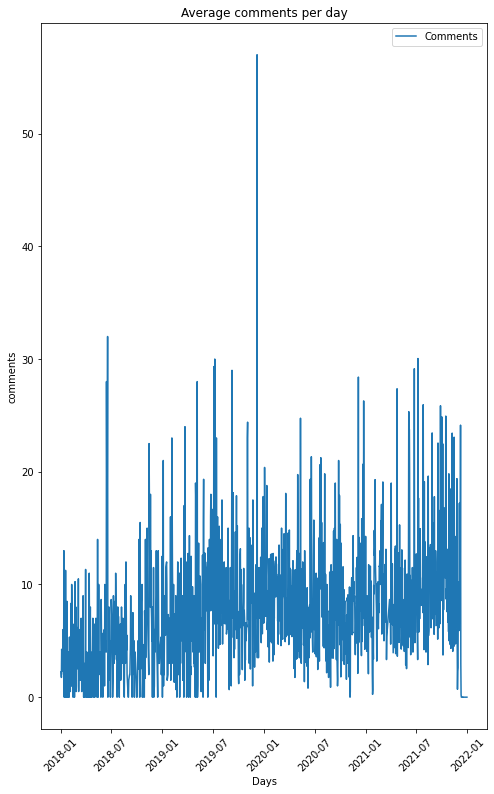

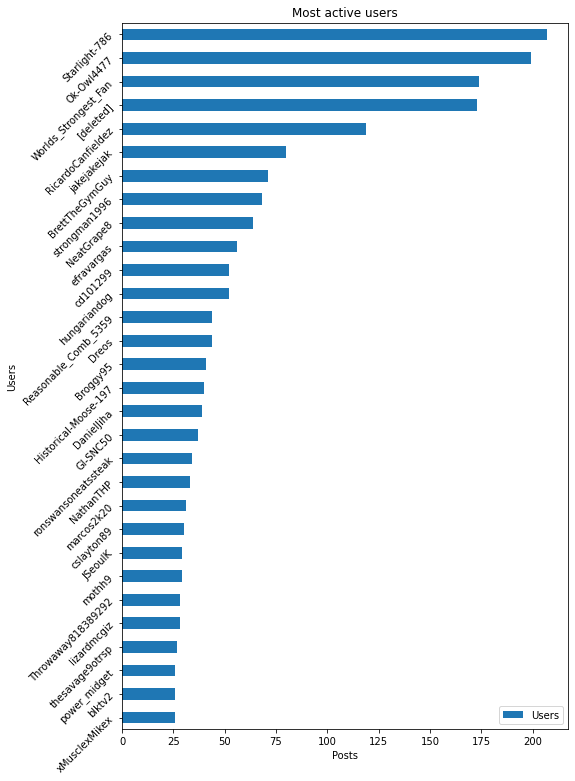

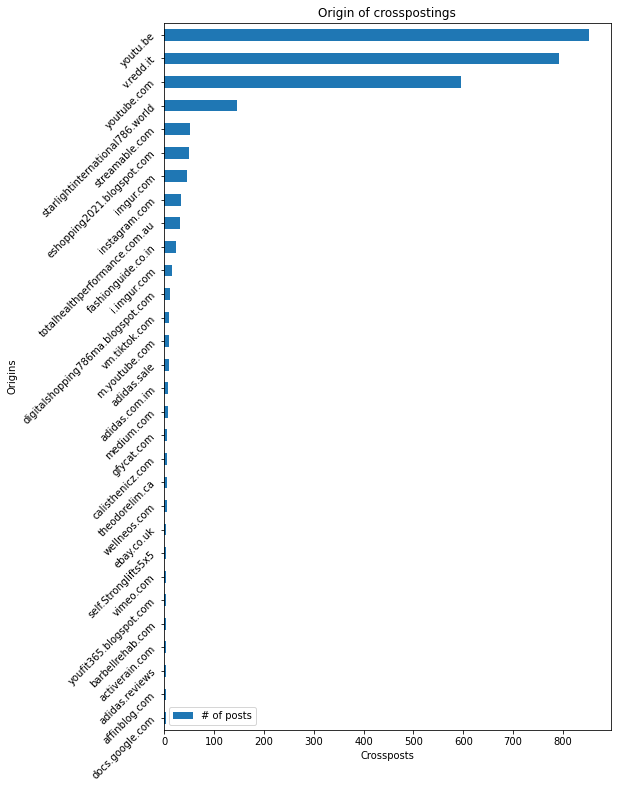

In [100]:
subreddits_for_analysis = ['BBQ',  'budgetfood', 'fromscratch', 'Fitness', 'xxfitness', 'weightroom', 'powerlifting', 
                           'crossfit', 'orangetheory', 'AdvancedRunning', 'BeachBodyWorkouts', 'bodyweightfitness', 'homegym', 
                           'GYM','strength_training', 'fitness30plus', 'formcheck', 'running', 'trailrunning', 
                           'RunningWithDogs', 'loseit', 'progresspics', 'workout', 'Athleanx', 'beginnerfitness', 'hiking', 
                           'weightroom', 'StrongCurves', 'HealthyFood', 'Stronglifts5x5', 'C25K', 'depression', 'mentalhealth', 
                           'Meditation', 'yoga', 'pilates', 'Anxiety', 'offmychest', 'mentalillness', 'Positivity', 
                           'GetMotivated', 'happy','food', 'homefitness', 'fitnessonline', 'homegym', 'GYM', 
                           'strength_training']

subreddits_for_analysis_4 = [ ]

subreddits_for_analysis_7 = ['52weeksofcooking', 'BreakfastFood', 'CulinaryPlating', 'mealprep', 'ketorecipes', 'slowcooking', 
                             'MealPrepSunday', 'TodayIAte',  'tonightsdinner']

for subreddit_name in subreddits_for_analysis_4:
    file_name = f'dataset_{subreddit_name}_posts_2018_2022.csv'
    df = pd.read_csv(file_name)
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    perform_analysis(df, subreddit_name)
    
    


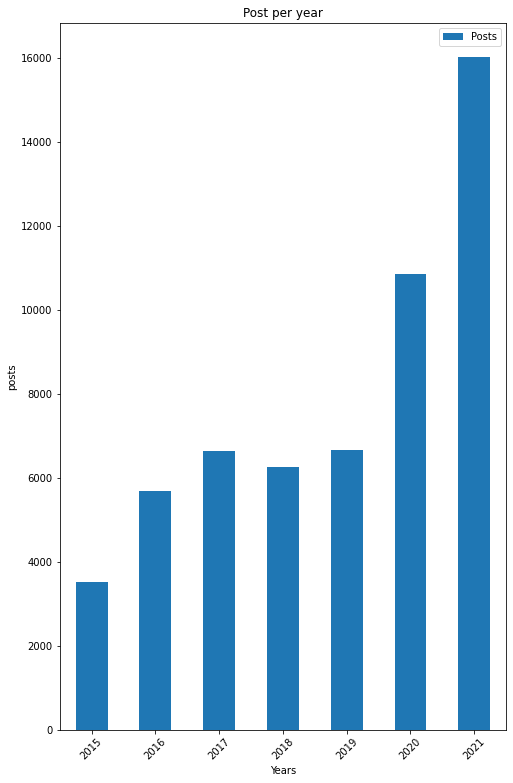

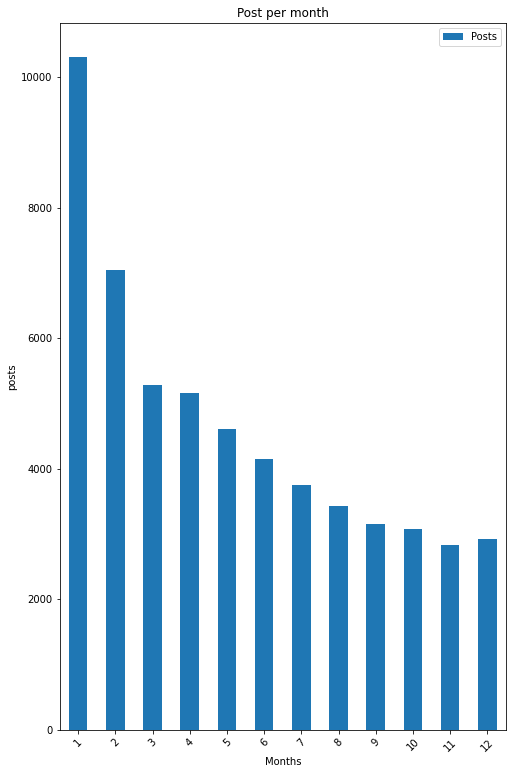

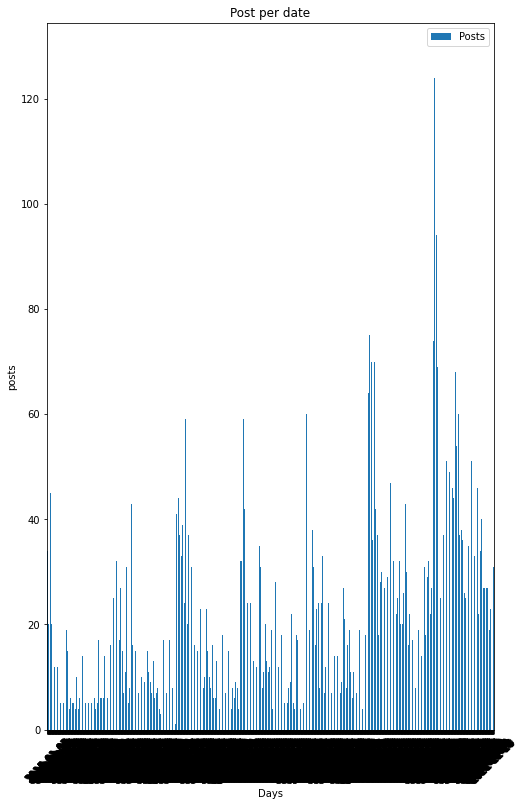

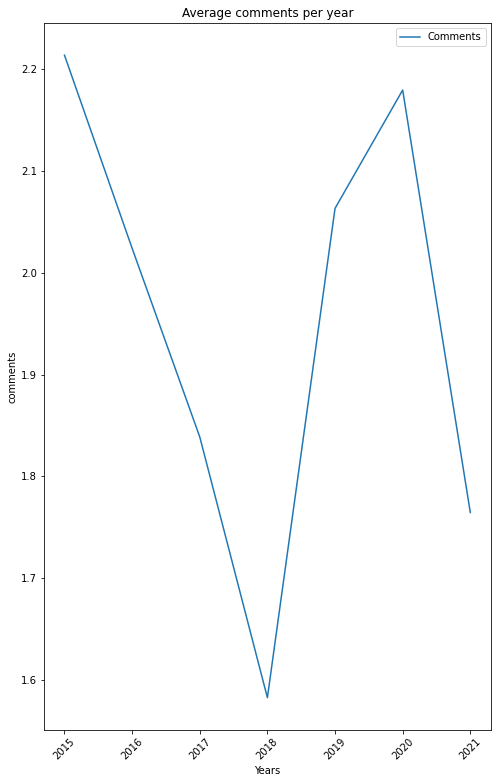

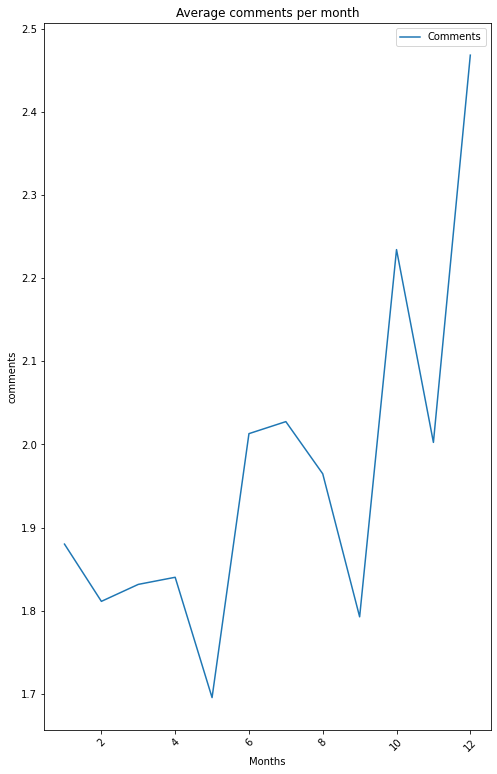

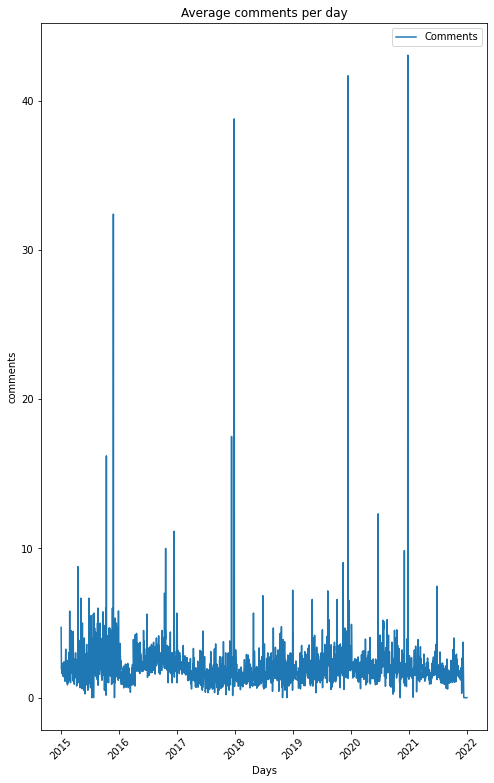

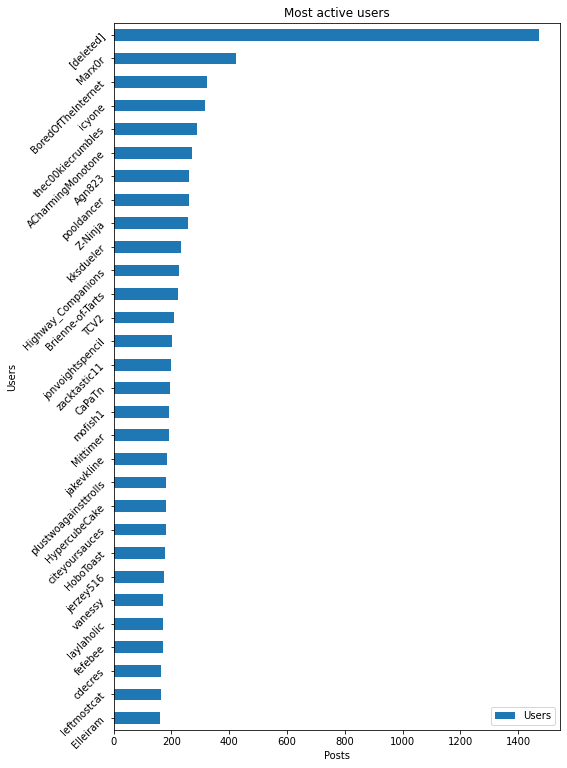

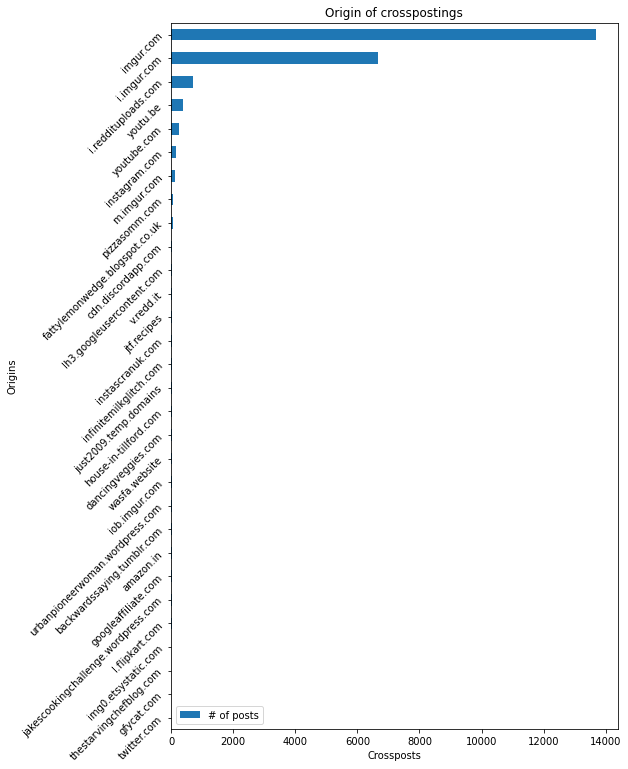

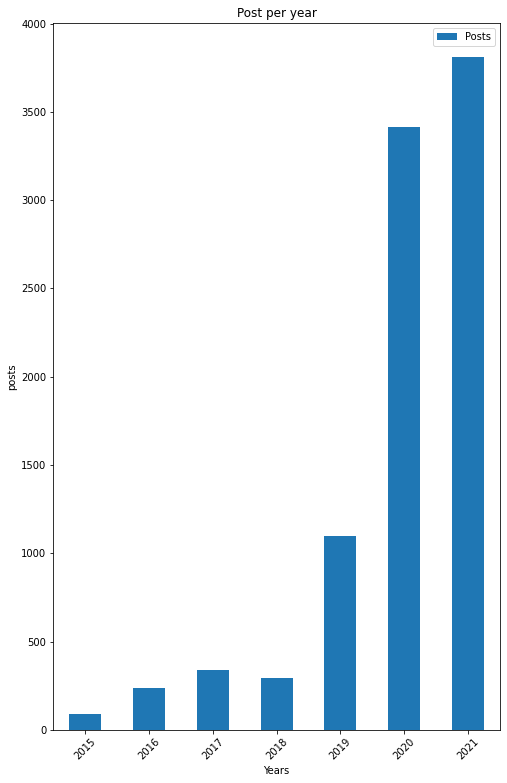

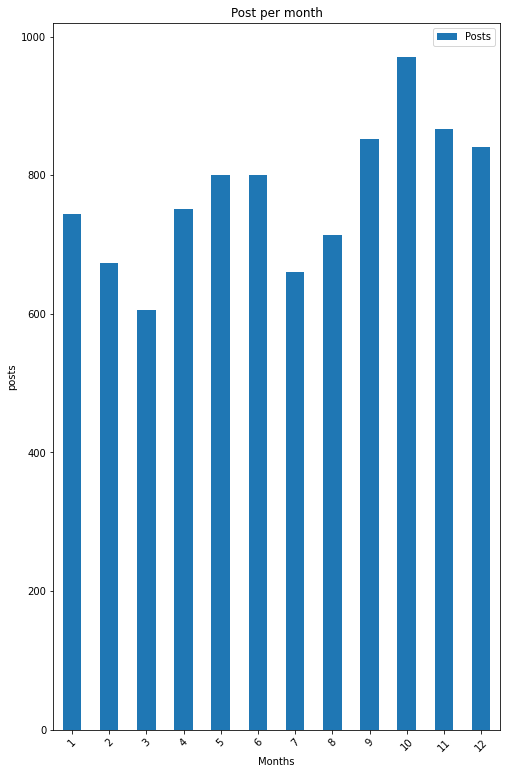

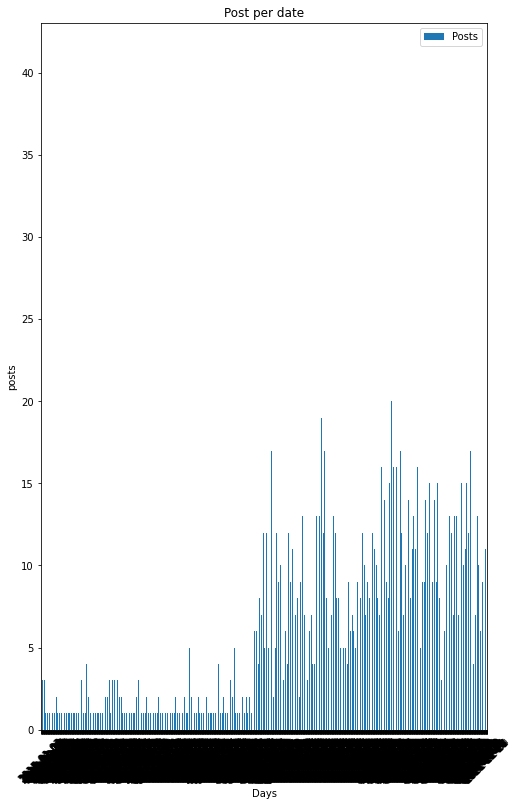

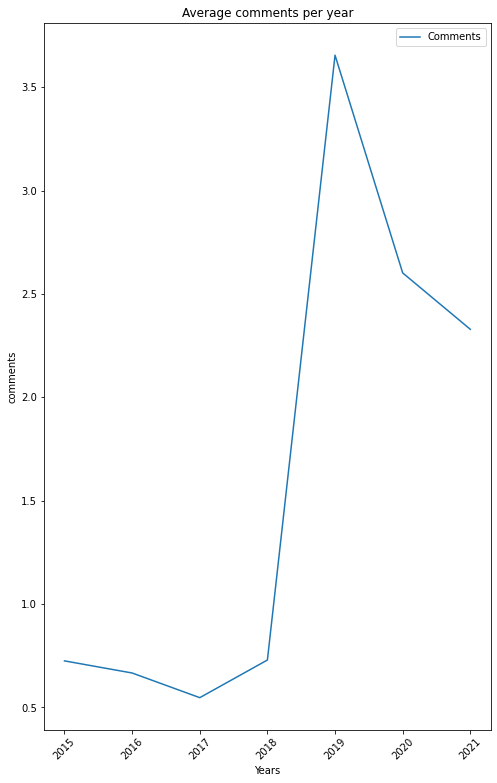

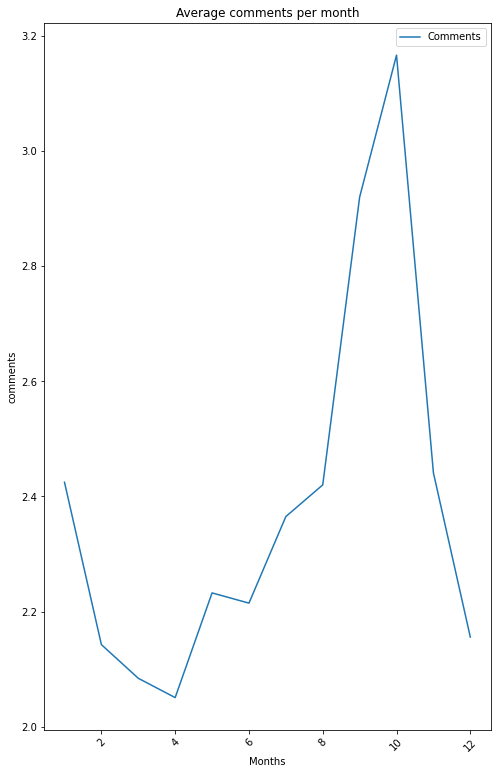

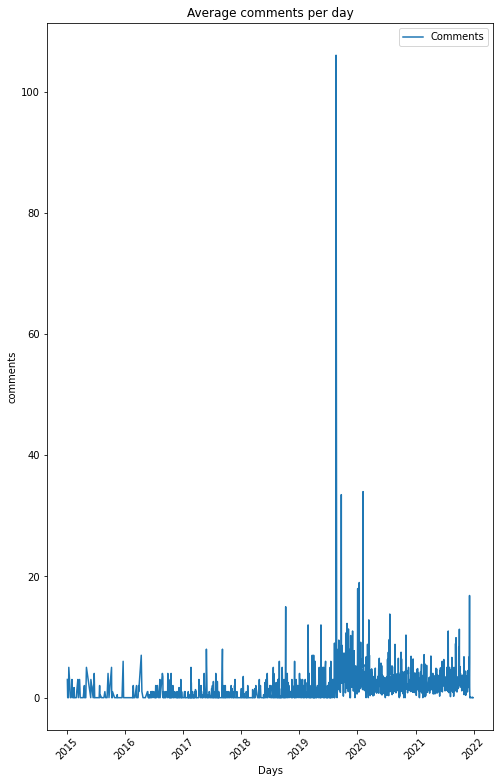

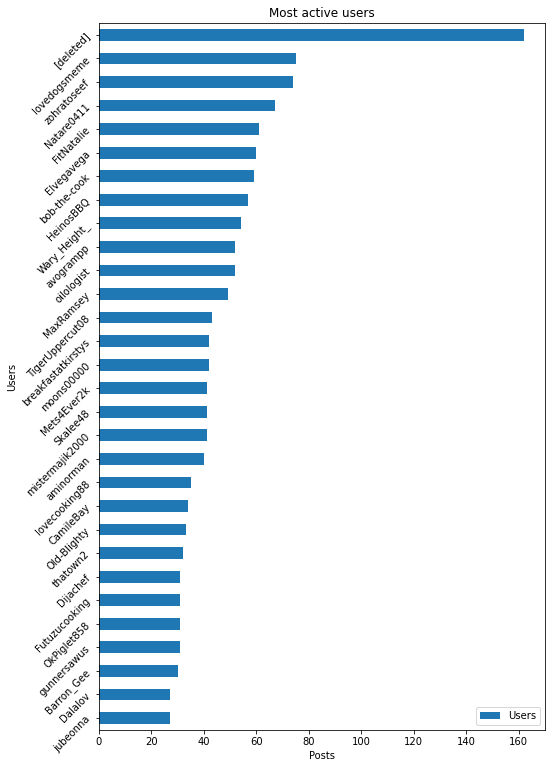

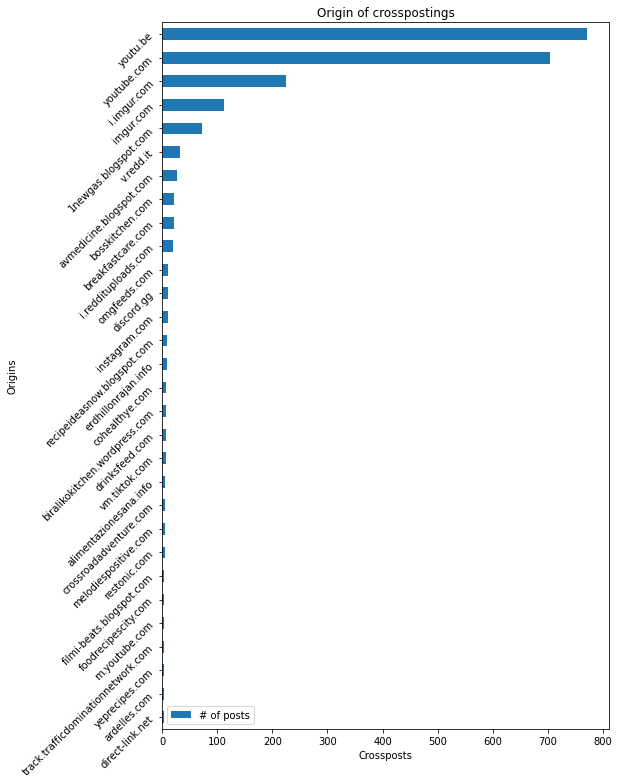

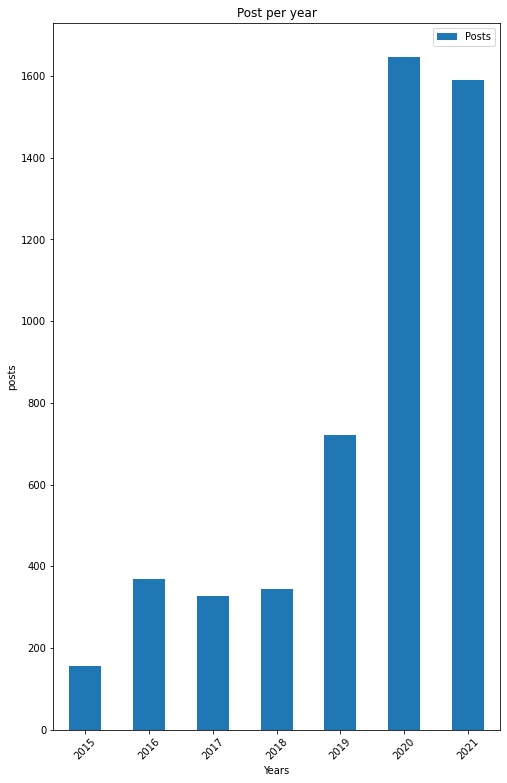

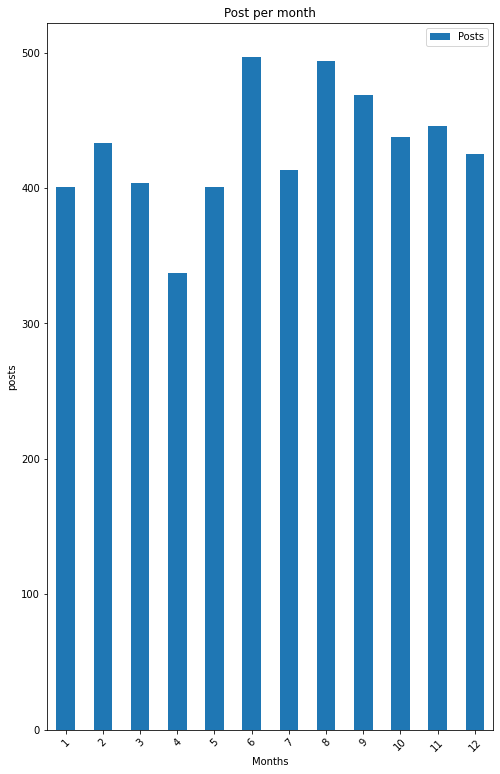

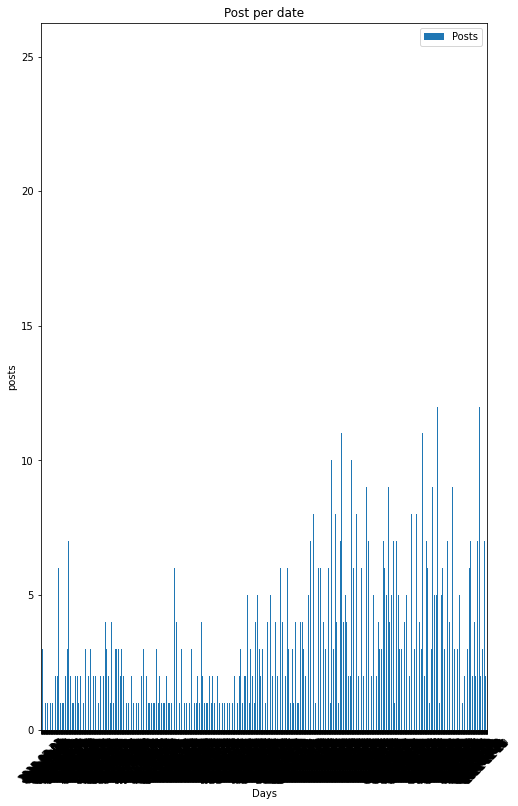

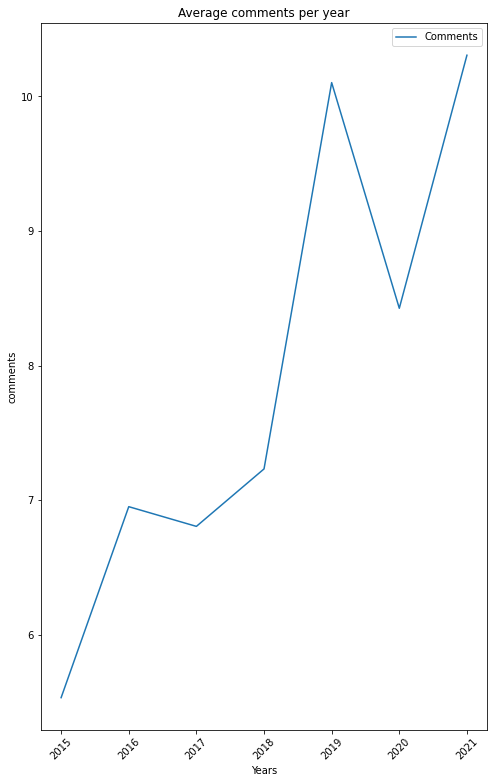

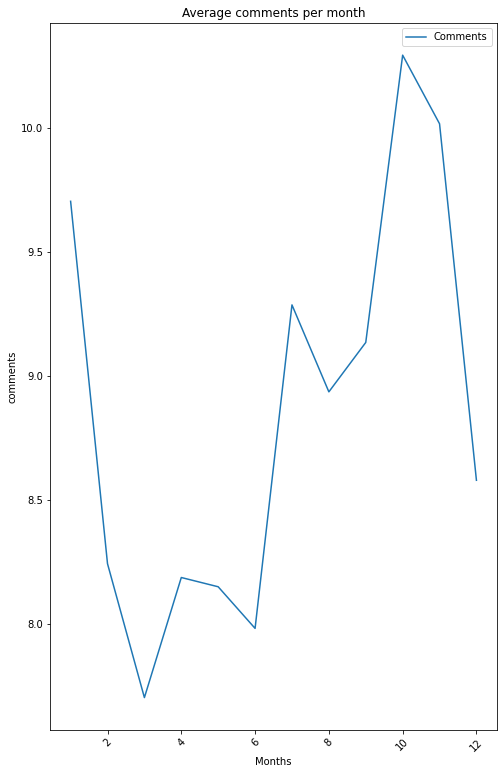

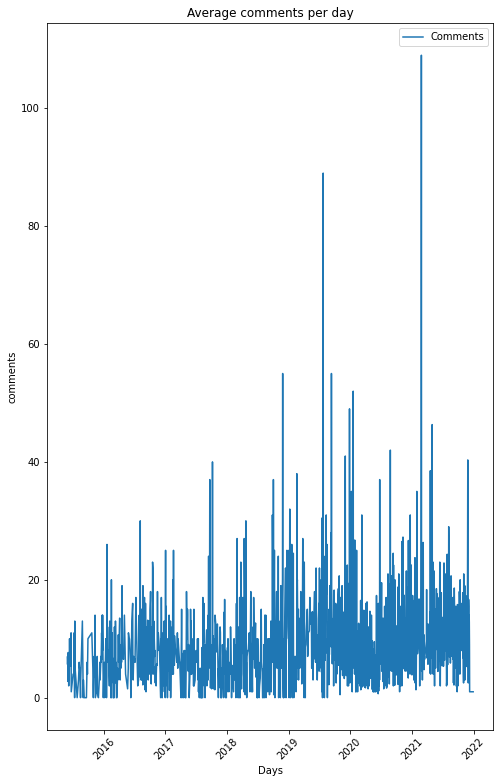

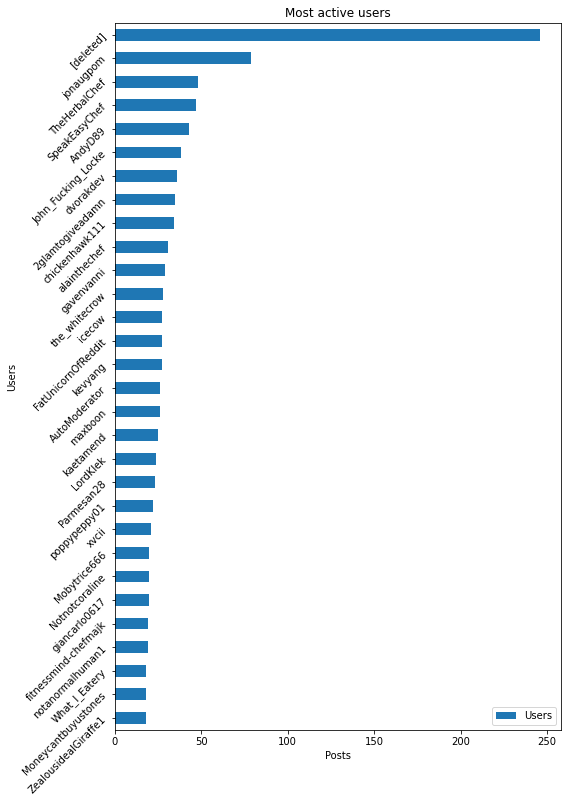

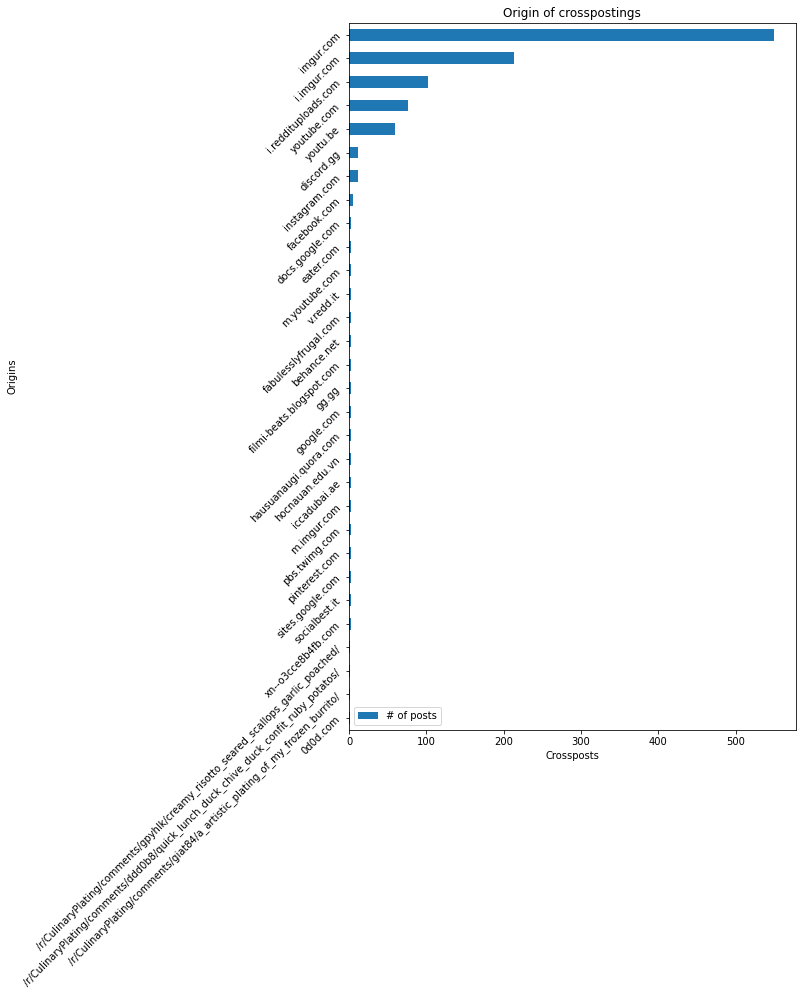

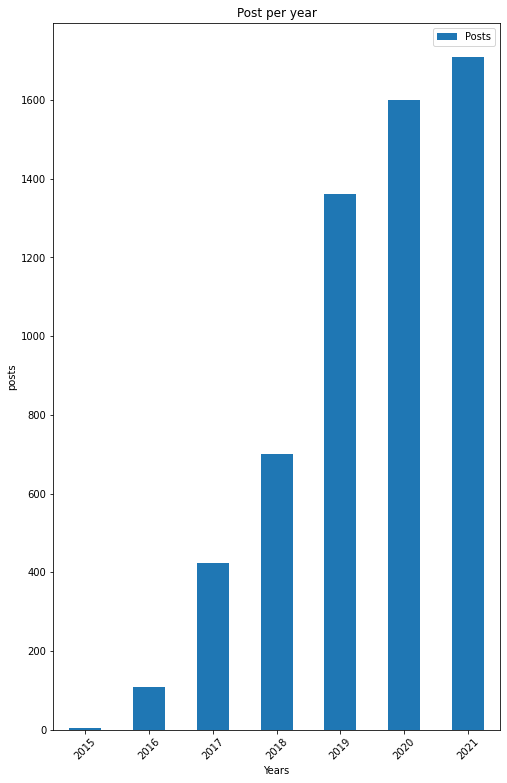

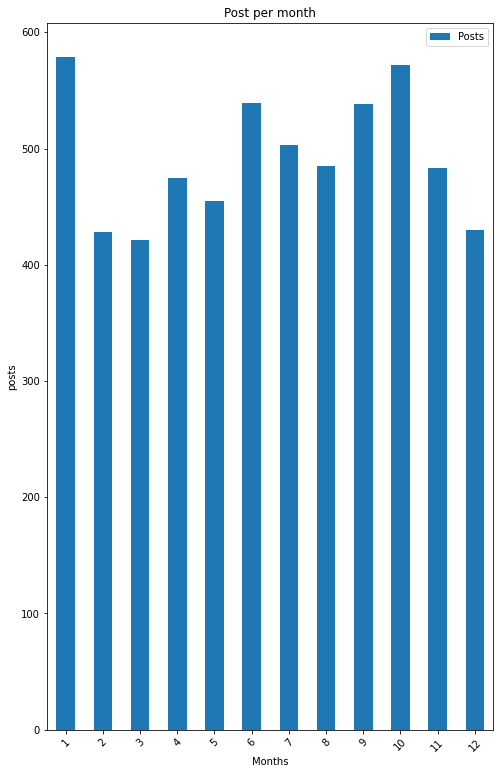

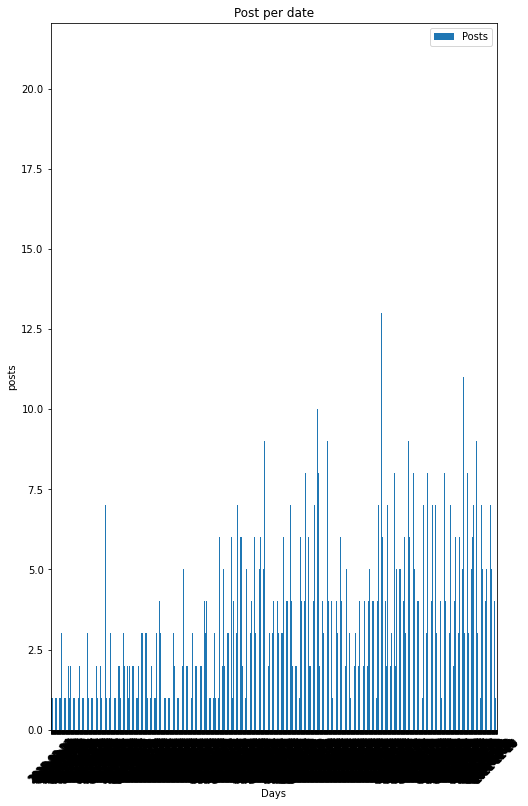

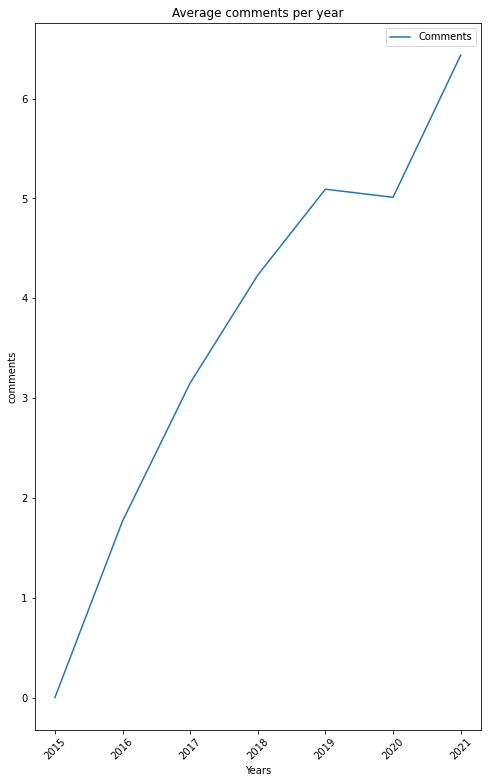

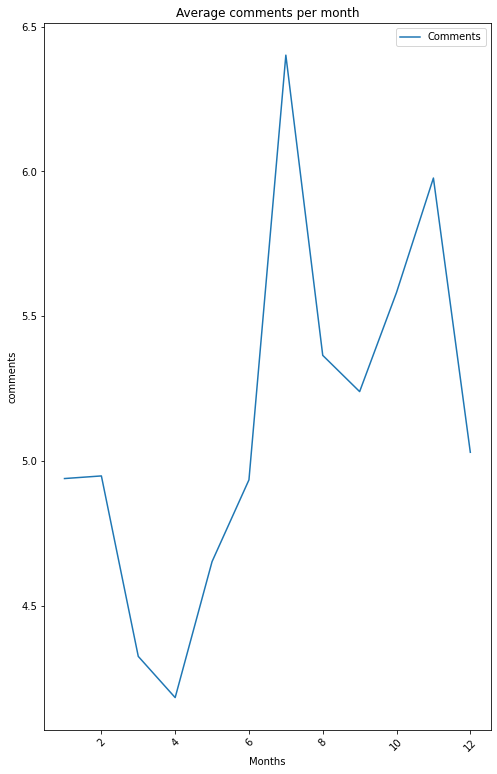

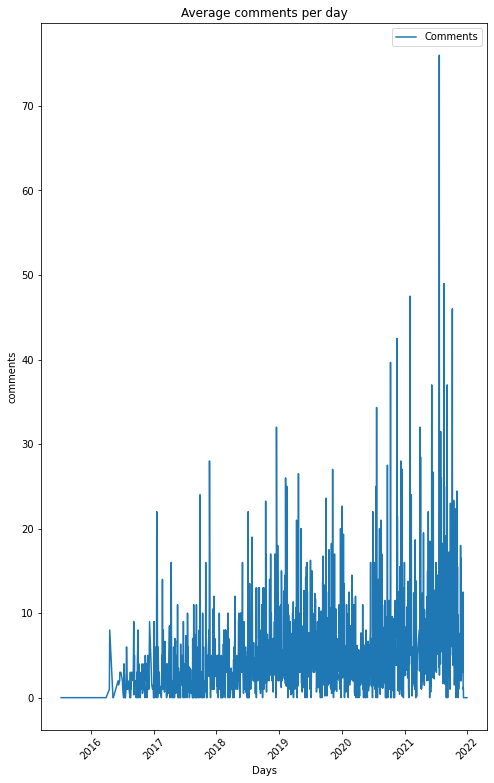

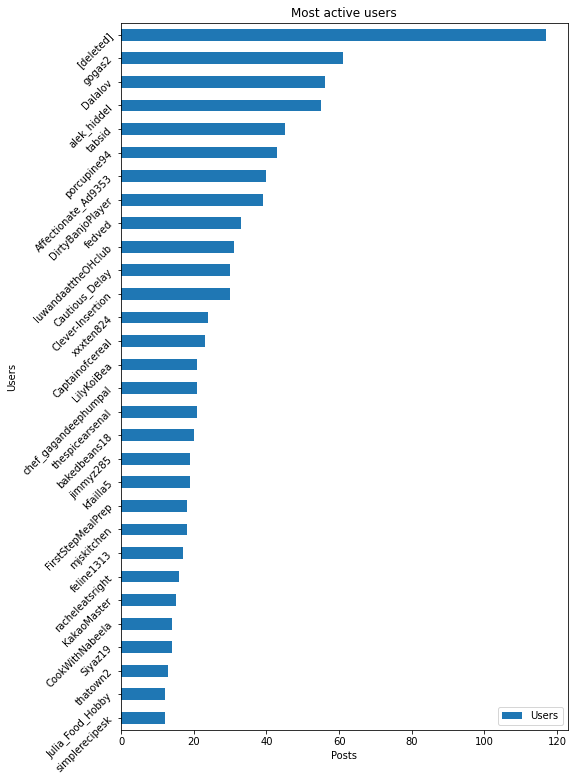

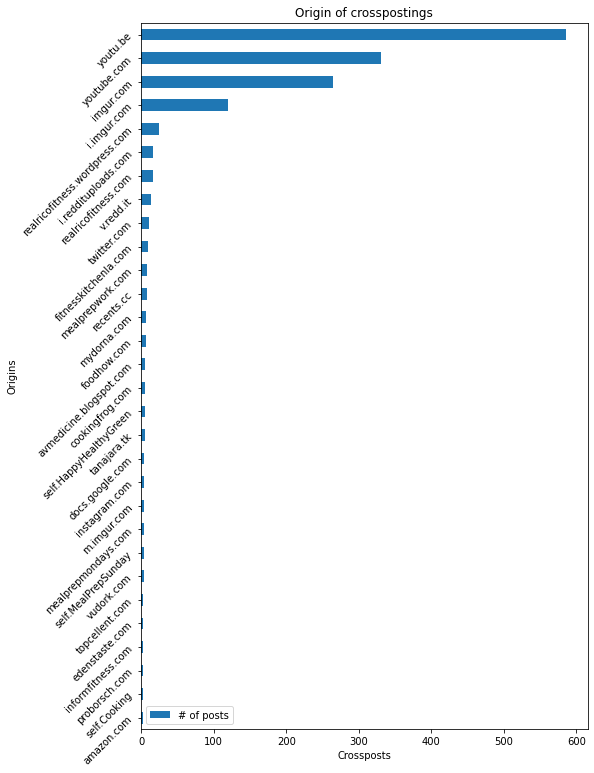

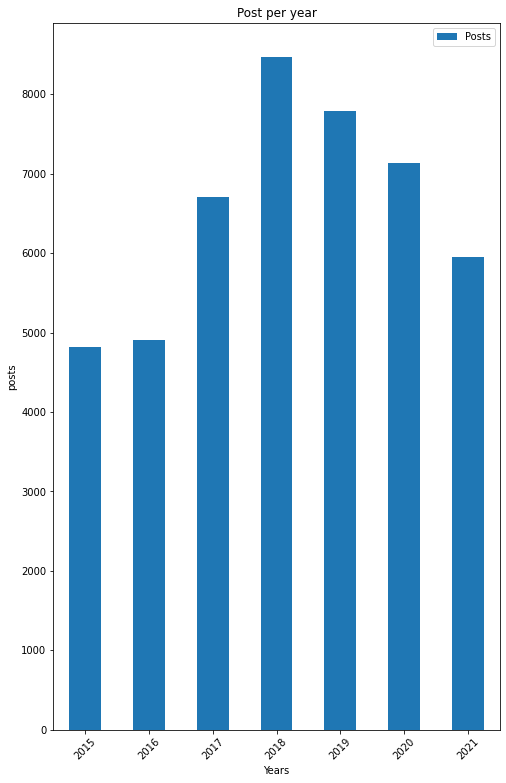

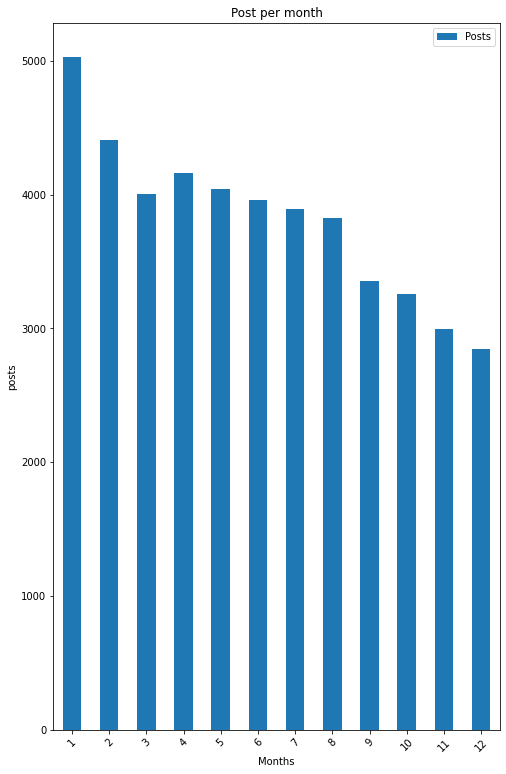

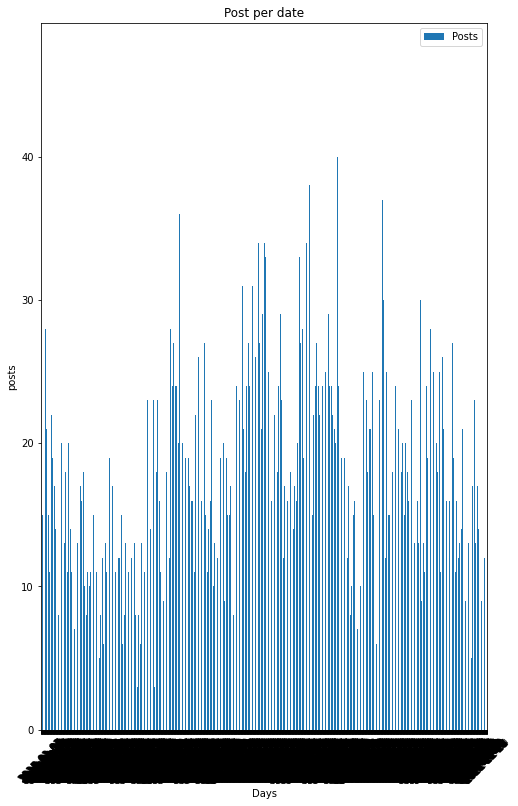

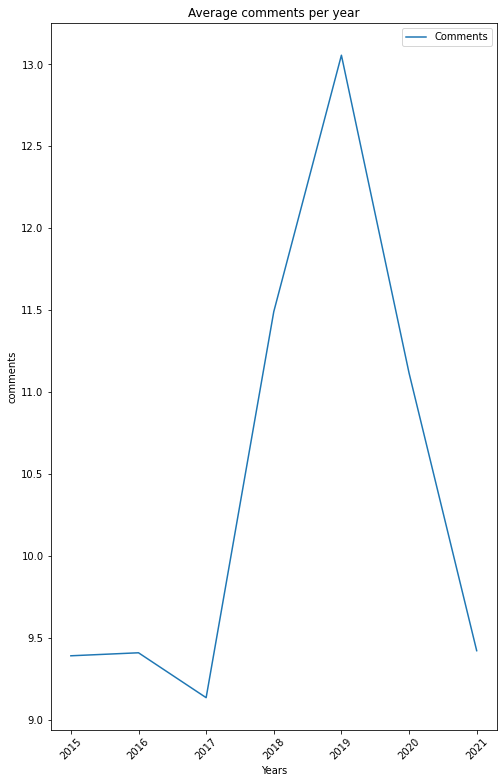

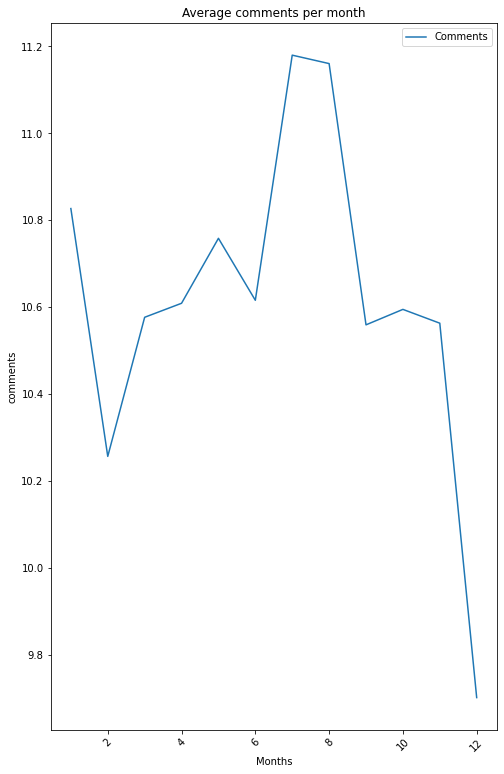

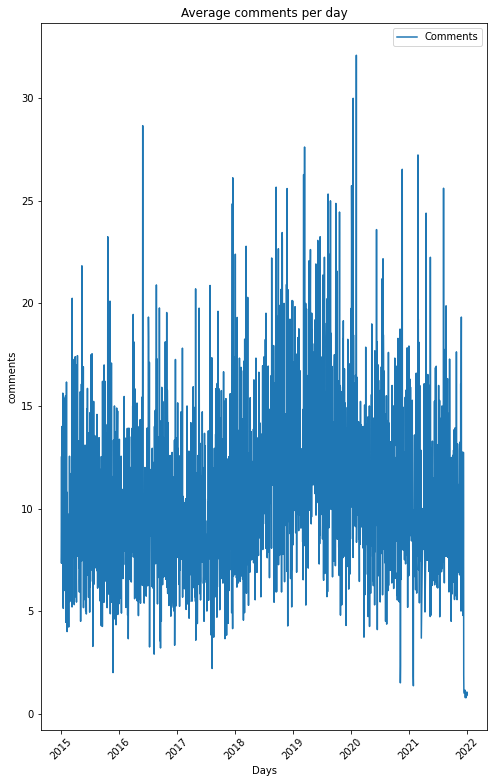

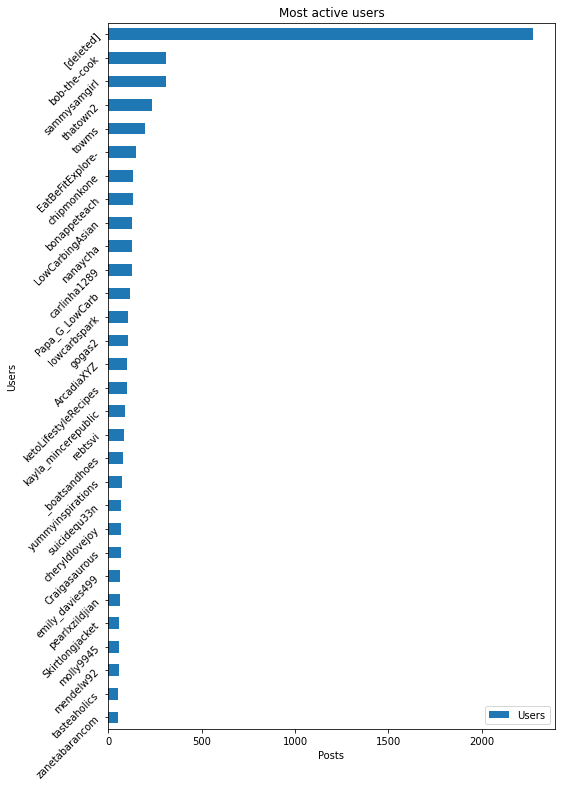

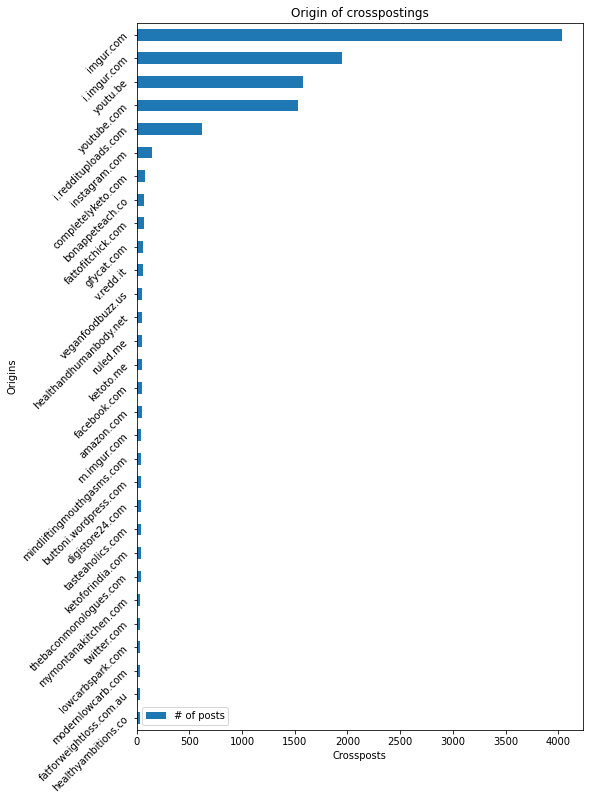

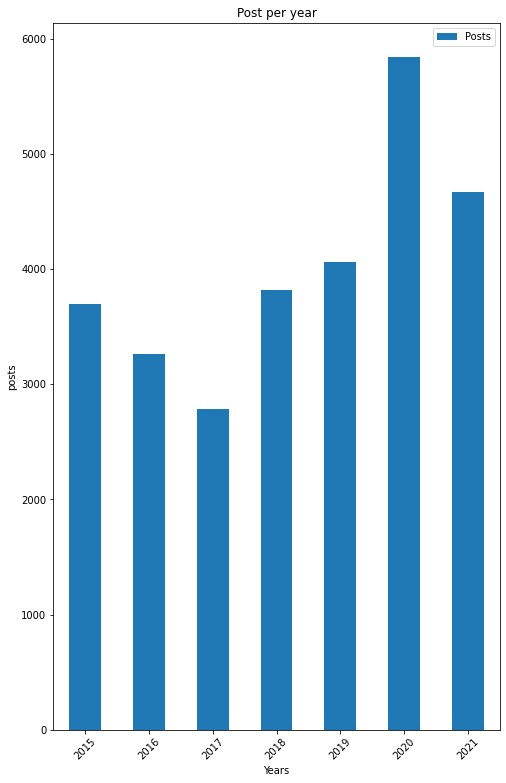

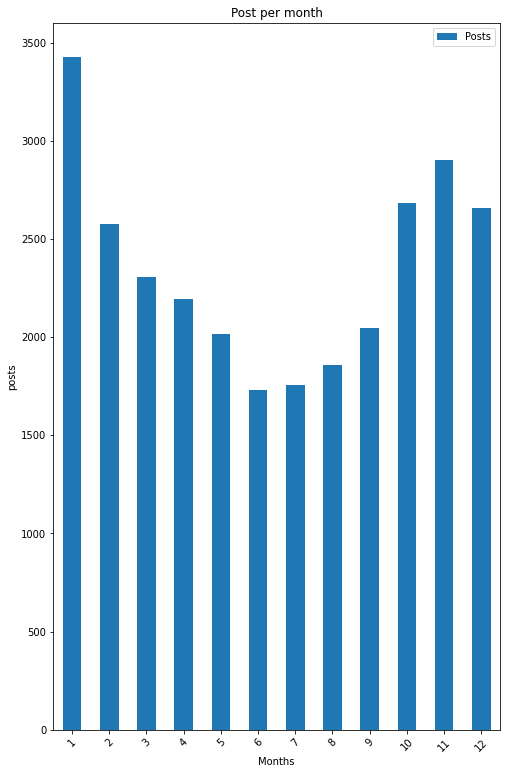

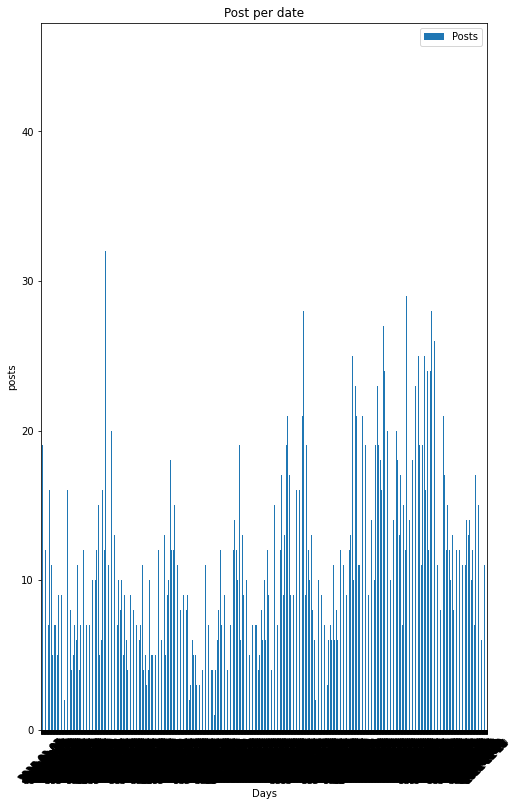

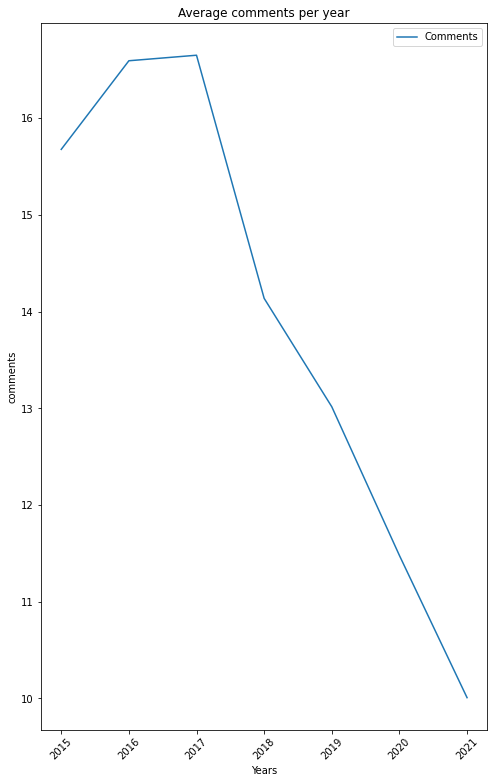

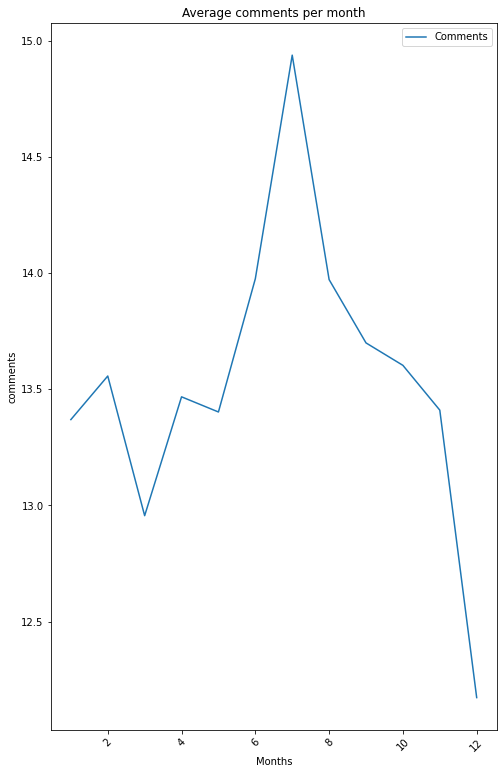

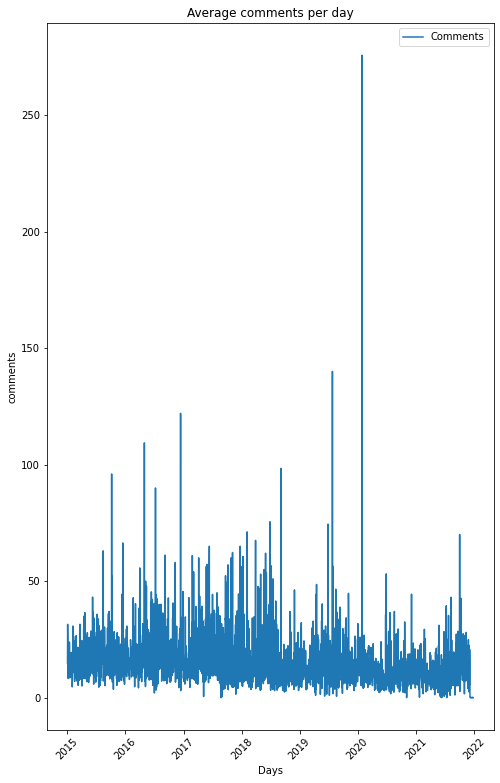

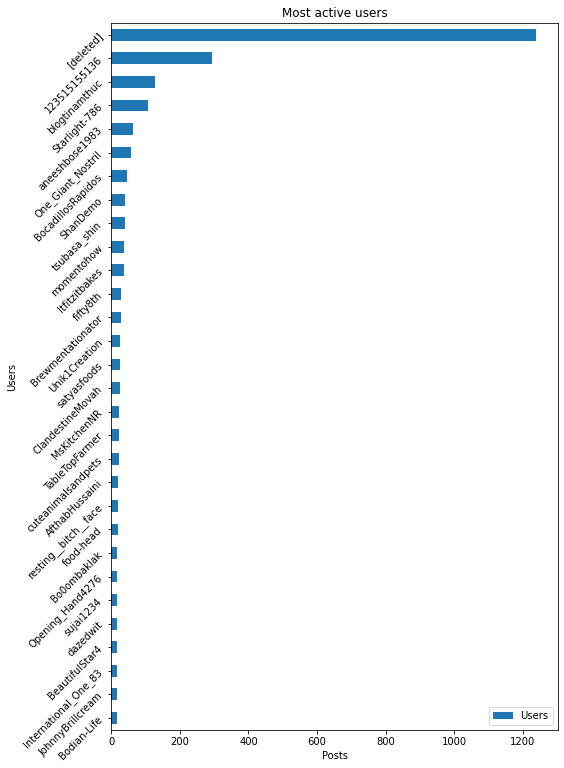

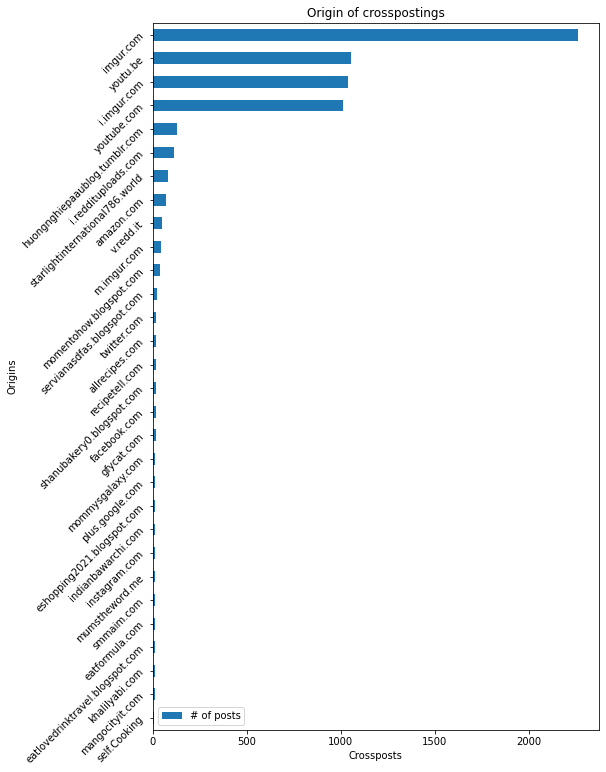

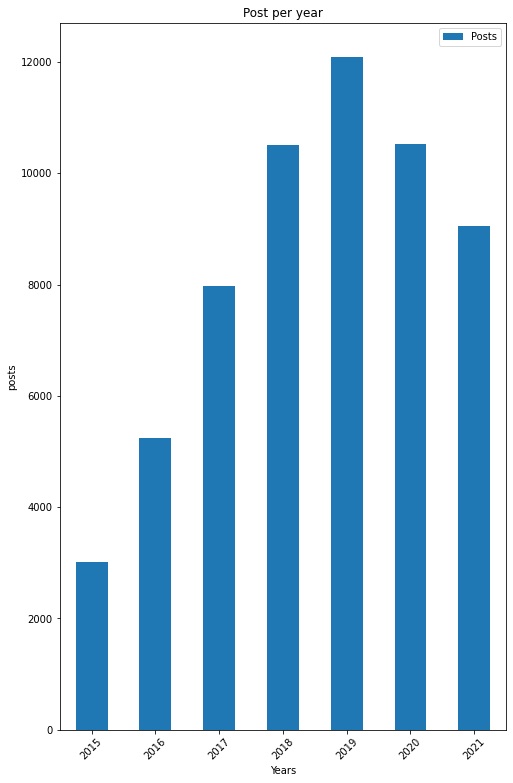

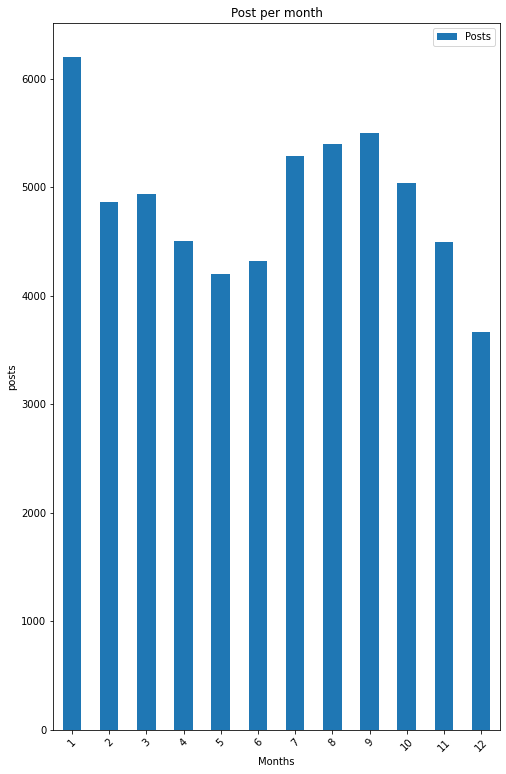

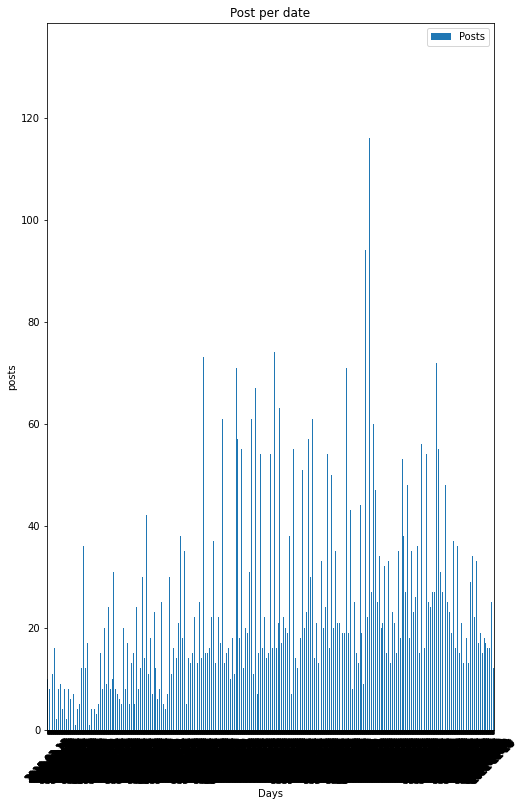

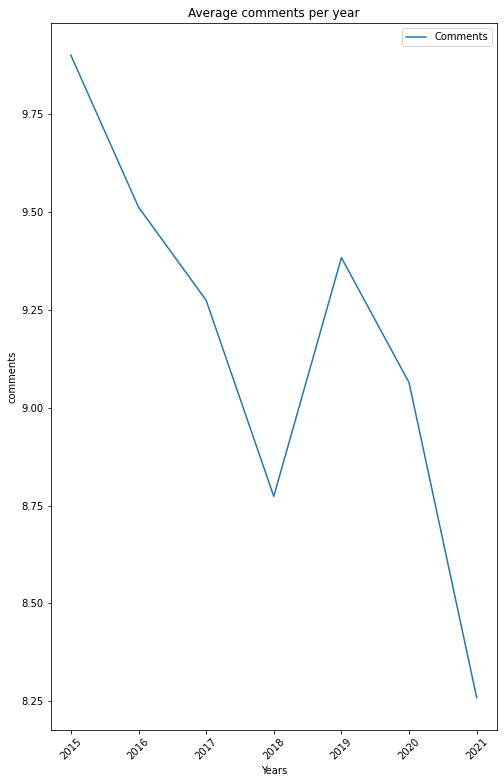

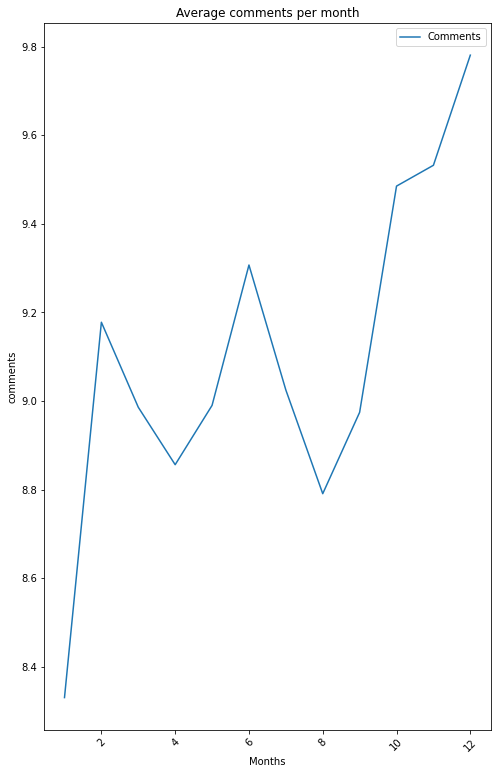

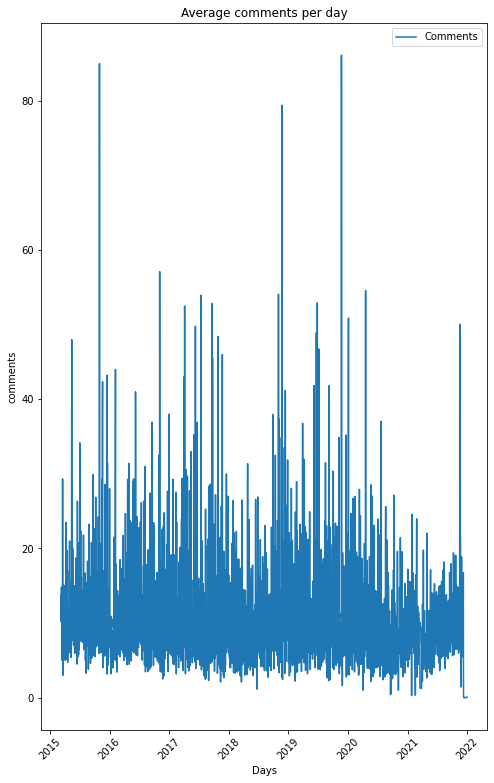

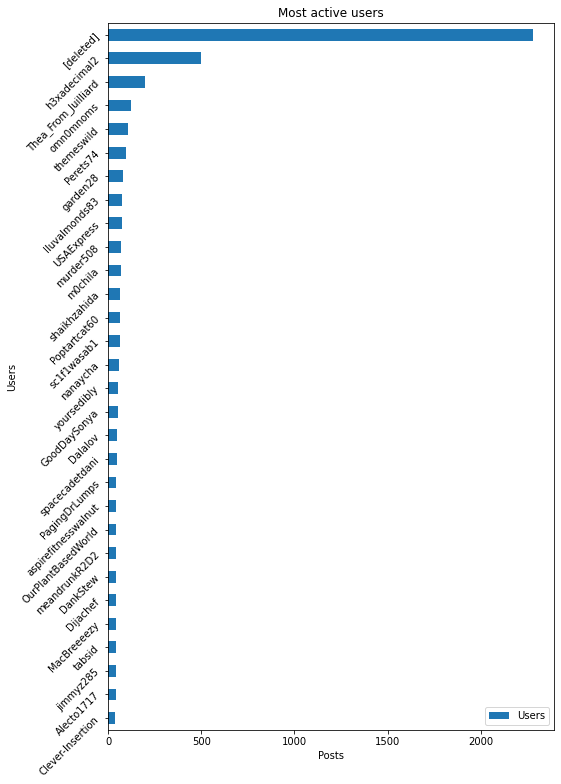

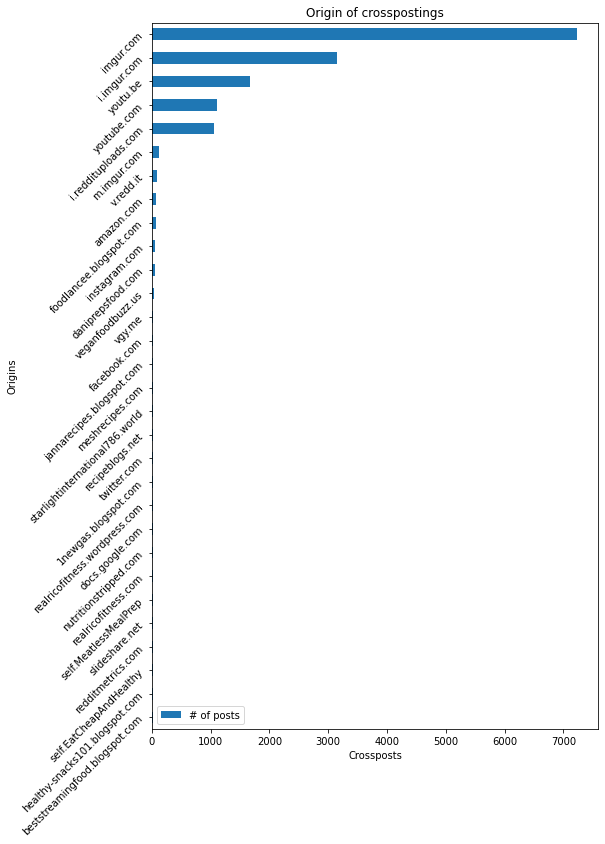

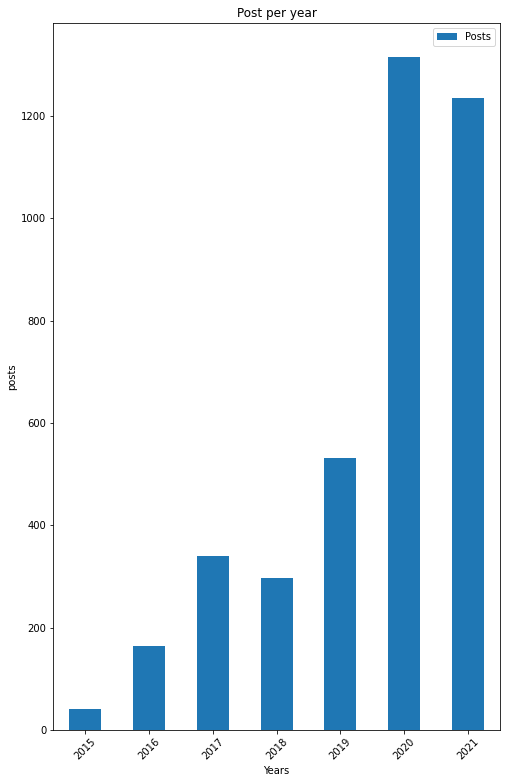

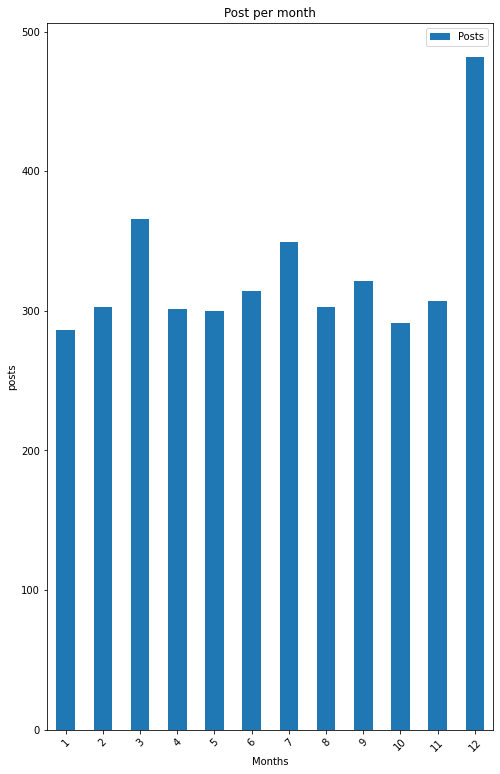

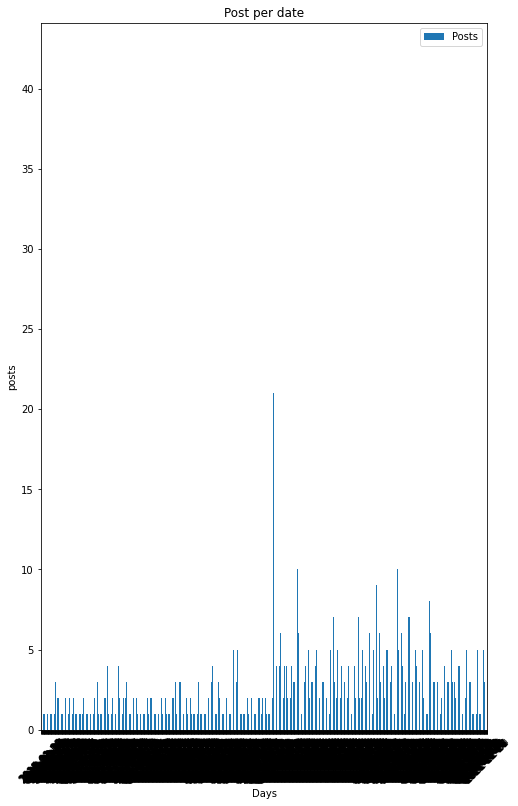

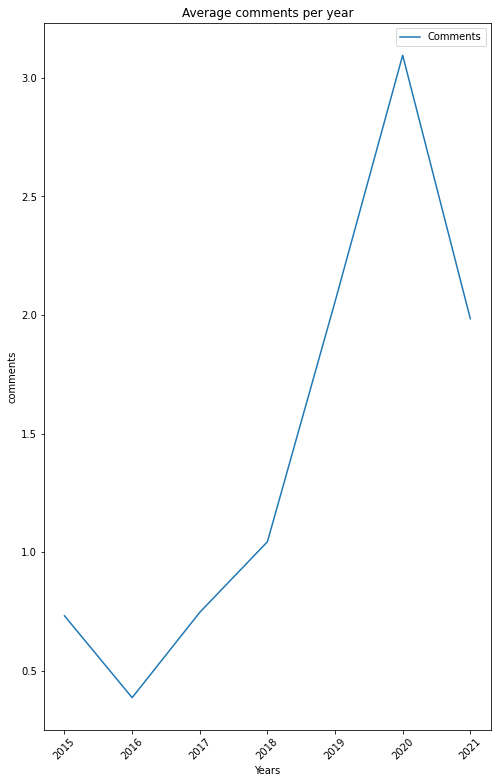

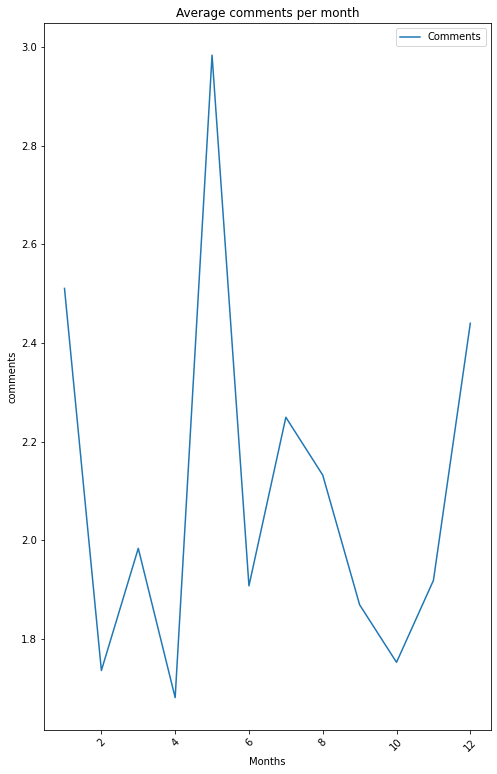

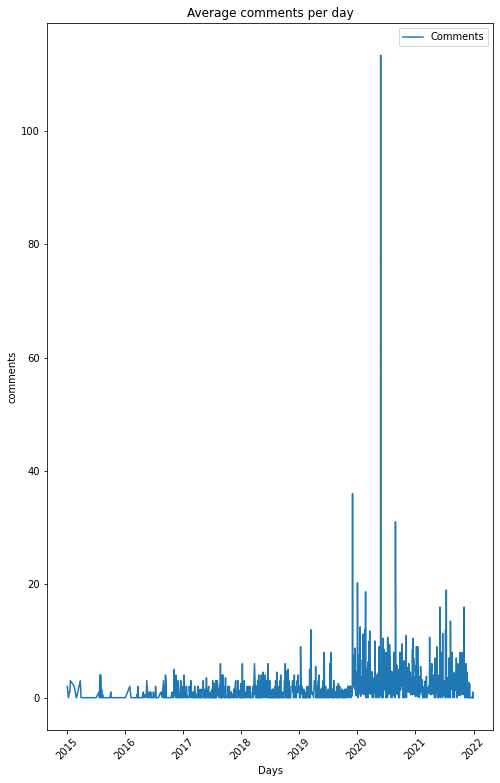

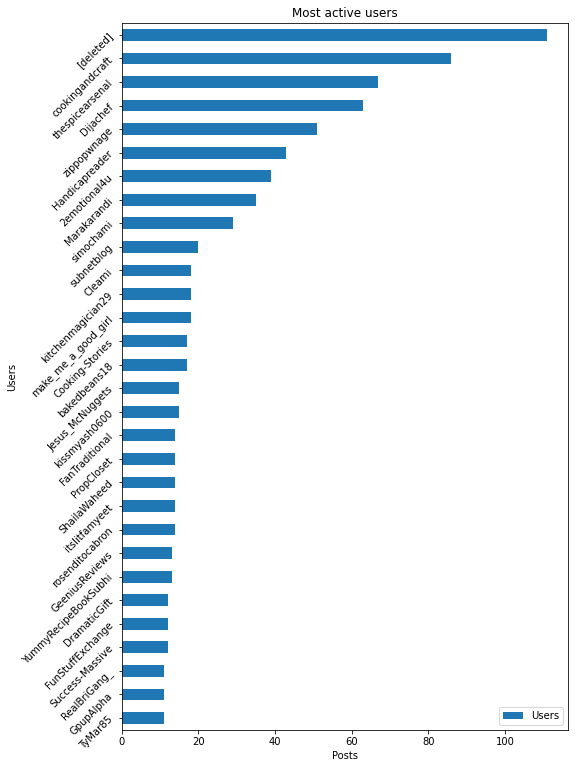

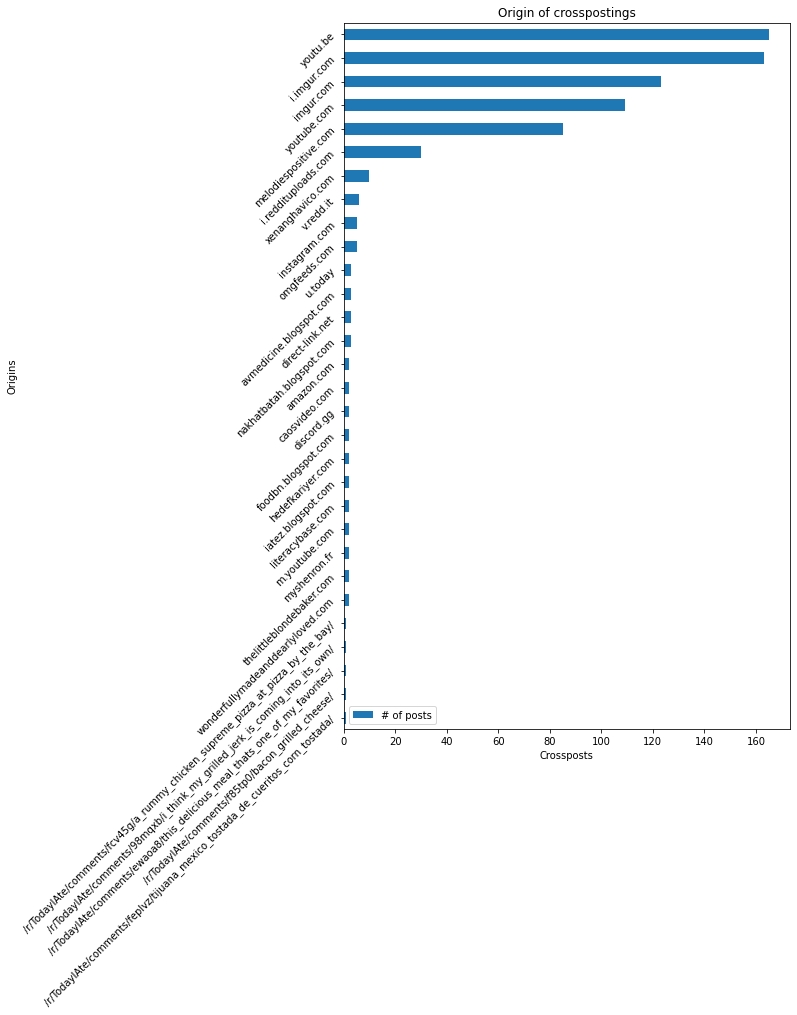

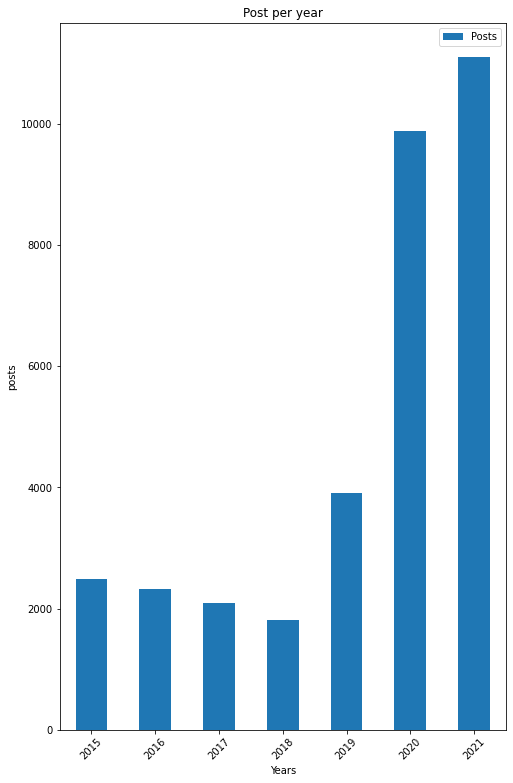

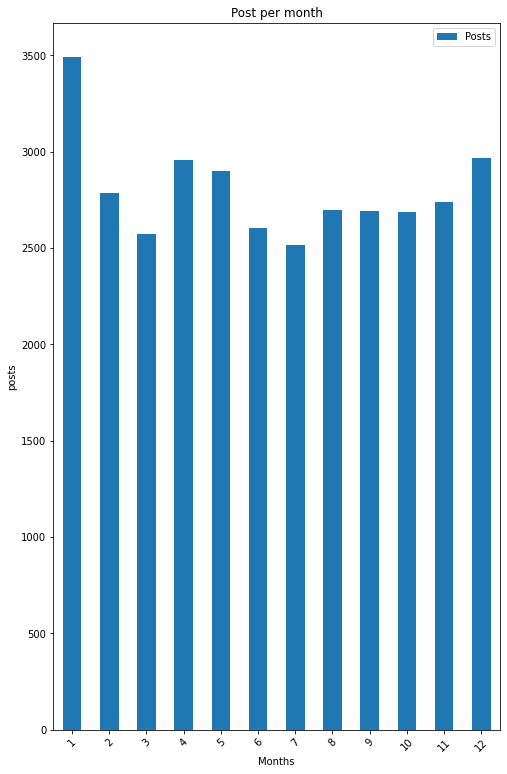

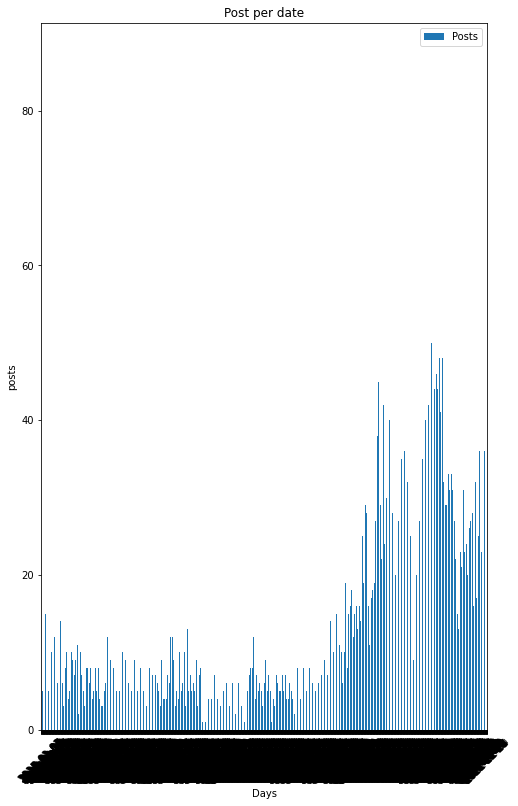

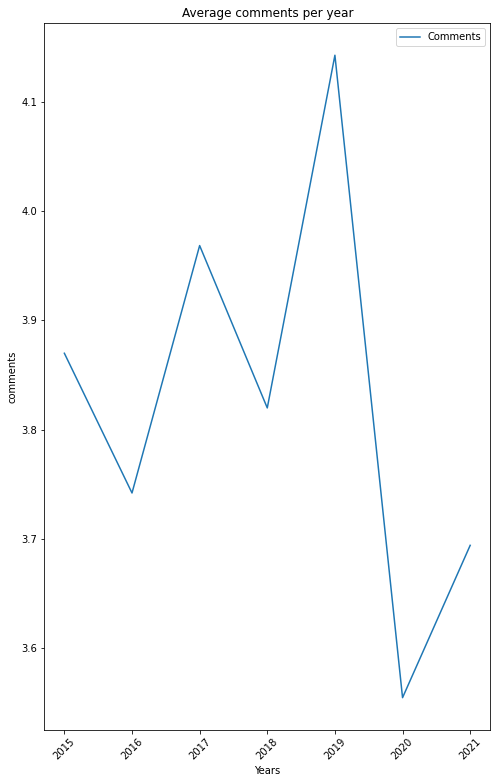

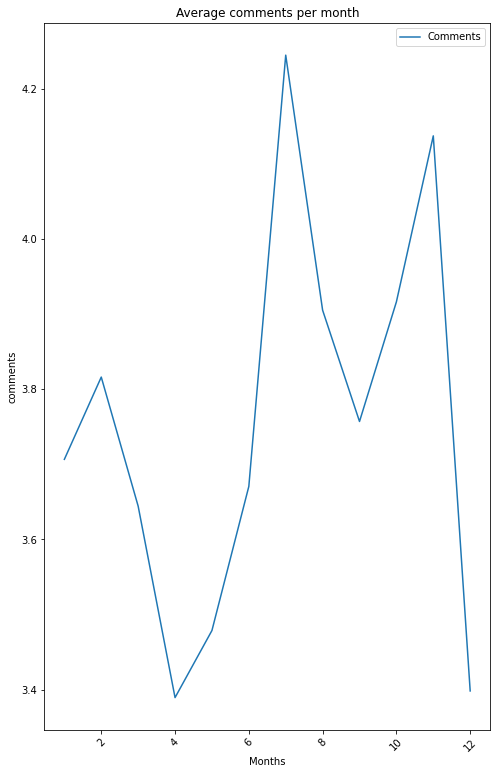

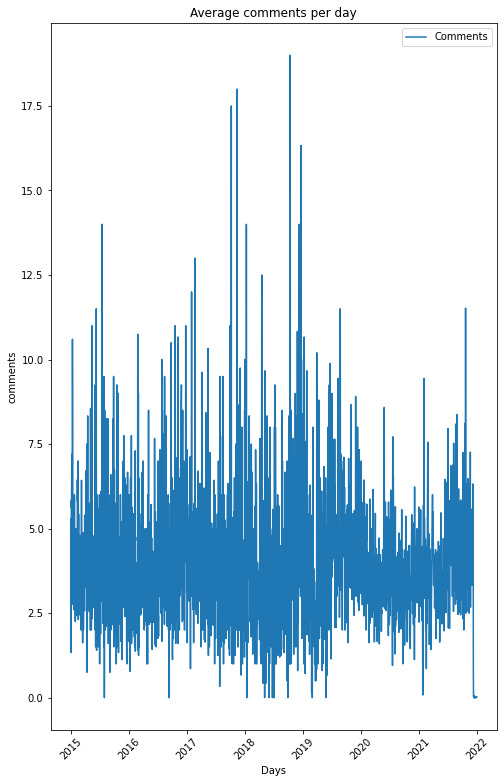

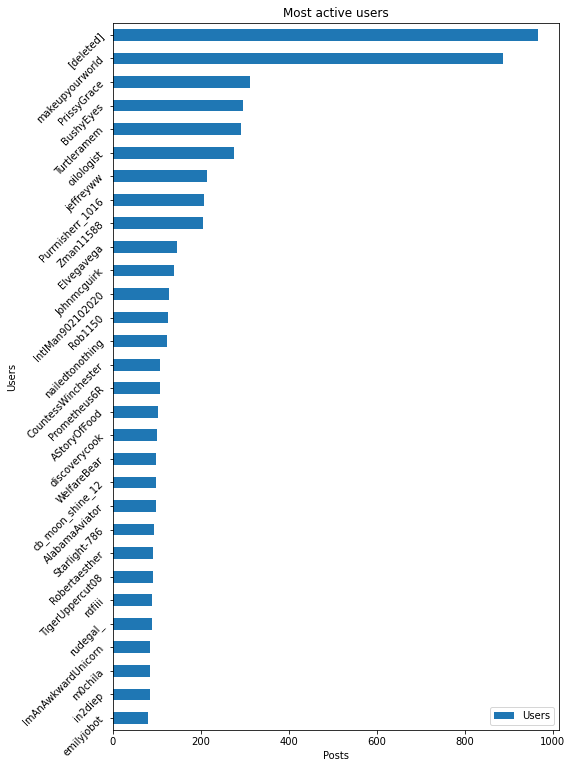

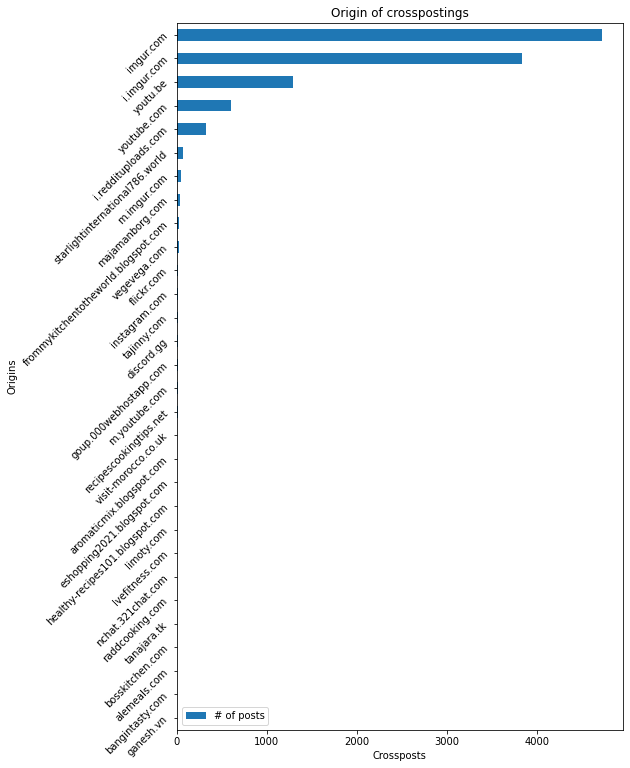

In [101]:
for subreddit_name in subreddits_for_analysis_7:
    file_name = f'dataset_{subreddit_name}_posts_2015_2022.csv'
    df = pd.read_csv(file_name)
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    perform_analysis(df, subreddit_name)

In [109]:
df_1 = pd.read_csv(f'dataset_MealPrepSunday_posts_2015_2022.csv')
df_2 = pd.read_csv(f'dataset_GYM_posts_2018_2022.csv')

print("Size of MealPrepSunday dataframe: " + str(len(df_1)))
print("Size of GYM dataframe: " + str(len(df_2)))

print('Merging the two datasets by user name (trying to find common users): ')

df_3 = df_2.merge(df_1, on="author", how = 'inner')
print(df_3)
print('Size of the dataframe after merging: ' + str(len(df_3)))

Size of MealPrepSunday dataframe: 58411
Size of GYM dataframe: 54344
Merging the two datasets by user name (trying to find common users): 
           id_x           author           datetime_x  \
0        7o2tw3        [deleted]  2018-01-04 14:03:42   
1        7o2tw3        [deleted]  2018-01-04 14:03:42   
2        7o2tw3        [deleted]  2018-01-04 14:03:42   
3        7o2tw3        [deleted]  2018-01-04 14:03:42   
4        7o2tw3        [deleted]  2018-01-04 14:03:42   
...         ...              ...                  ...   
1569882  r55x53  Either_Buy_3621  2021-11-29 22:17:34   
1569883  rcjamd   AvalancheQueen  2021-12-09 15:53:22   
1569884  rgk7ew      AgentDadBod  2021-12-15 00:19:20   
1569885  rlhgsq  bathroombrowser  2021-12-21 16:50:12   
1569886  rn07ls      red_eye1999  2021-12-23 18:08:48   

                                                  domain_x  \
0                                                 self.GYM   
1                                                 se

In [108]:
df_1 = pd.read_csv(f'dataset_TodayIAte_posts_2015_2022.csv')
df_2 = pd.read_csv(f'dataset_homefitness_posts_2018_2022.csv')

print("Size of TodayIAte dataframe: " + str(len(df_1)))
print("Size of homefitness dataframe: " + str(len(df_2)))

print('Merging the two datasets by user name (trying to find common users): ')

df_3 = df_3 = df_1.merge(df_2, on="author", how = 'inner')
print(df_3)
print('Size of the dataframe after merging: ' + str(len(df_3)))

Size of TodayIAte dataframe: 3923
Size of homefitness dataframe: 8789
Merging the two datasets by user name (trying to find common users): 
        id_x          author           datetime_x                 domain_x  \
0     2r64s8       [deleted]  2015-01-03 04:39:51              i.imgur.com   
1     2r64s8       [deleted]  2015-01-03 04:39:51              i.imgur.com   
2     2r64s8       [deleted]  2015-01-03 04:39:51              i.imgur.com   
3     2r64s8       [deleted]  2015-01-03 04:39:51              i.imgur.com   
4     2r64s8       [deleted]  2015-01-03 04:39:51              i.imgur.com   
...      ...             ...                  ...                      ...   
8522  oib6lb      avmedicine  2021-07-11 21:44:23  avmedicine.blogspot.com   
8523  oib6lb      avmedicine  2021-07-11 21:44:23  avmedicine.blogspot.com   
8524  oib6lb      avmedicine  2021-07-11 21:44:23  avmedicine.blogspot.com   
8525  qou2pe         assfatq  2021-11-07 19:05:03           self.TodayIAte   
85